# Proyectos iniciados entre 2009-2024
## ¿Qué es una iniciativa legislativa?

La “iniciativa legislativa”, es la facultad de presentar proyectos, corresponde a los diputados, senadores y al presidente de la Nación
Hay distintos tipos de proyectos:

* Proyectos de ley: destinados a crear, modificar, sustituir o abrogar una ley, institución o norma de caracter general.

* Proyectos de resolución: destinados a la adopción de medidas relativas a la composición u organización interna del cuerpo, las modificaciones del reglamento y, en general, de toda disposición de carácter imperativo que pueda adoptar la Cámara.

* Proyectos de declaración: destinados a expresar una opinión del cuerpo sobre cualquier hecho de carácter público o privado, o manifestar la voluntad de que el Poder Ejecutivo practique algún acto en particular.

**Fuente de datos base**
* Fuente de datos: proyectos parlamentarios1.2.csv (actualización 2 de enero de 2025).
    * Cantidad de registros de proyectos 105.511
        * Cámara de origen: Diputados - Cantidad de registros de proyectos 103.535
            * Ventana: **2009-2024 97742 (97742/103.535 94%)**
    



In [1]:
# Cargar las librerías necesarias
from dotenv import load_dotenv
import pandas as pd
import pickle 
import os
import sys
import numpy as np
import sweetviz as sv
import webbrowser
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

load_dotenv() 
BASE_DIR =  os.getenv("DIR_BASE")
sys.path.append(BASE_DIR)
pd.set_option('display.max_colwidth', None)

In [2]:
### CONFIGURACION DATOS
RESULTADOS_DIR = os.getenv("DIR_DATOS_PROCESADOS") # Acceder a las variables de entorno
sys.path.append(RESULTADOS_DIR)

### Proyectos iniciados en cámara de diputados

**Descripción de los datos**
* Proyecto.ID: identificador único de registro de proyecto.text.
* Título: título de proyecto.text.
* Publicación.Fecha: Fecha en que se publicará el proyecto, ya sea que fuera publicado en cualquier publicación del Congreso, o sin publicación, se registra el primer movimiento en Comisión o en Recinto.timestamp.                  
* Publicación.ID: identificador único de la publicación correspondiente. (ver dataset ‘Publicaciones’ [https://datos.hcdn.gob.ar/dataset/publicaciones/resource/9ef22cd7-b7d8-47a6-bbf3-79095d47275c] En proyectos iniciados en la Cámara de Senadores, este valor será nulo. También será nulo cuando el proyecto no tuviere publicación por ser iniciado en recinto o dictamen directo en comisión.text.
* Exp..Diputados: Número, identificador y Año del expediente.text.
* Tipo: Tipo de proyecto que puede ser de ley, de resolución o declaración.text.
* Cant_comisiones_dist: cantidad de comisiones distintas a las que fue girado el proyecto.int.
* Cant_giros: cantidad de veces en que un proyecto fue girado a comisiònes.int.
* Max_Orden: máximo orden de giro establecido cuando son varias las comisiones determinadas.int.                                
* Proyecto_girado_a_comisiones_SALUD: indica si los proyectos son 'GIRADO A COMISIONES DE SALUD','GIRADO A OTRAS COMISIONES' y 'SIN REGISTRO DE GIRO A COMISION'. Son proyectos girados a comisiones de Salud si están asociadas a comisiones de ['ACCION SOCIAL Y SALUD PUBLICA', 'ASISTENCIA SOCIAL Y SALUD PUBLICA', 'SALUD Y DEPORTE', 'SALUD'].text.
* Proyecto_SALUD: proyecto clasificado en Salud porque girado en primer término (como cabecera) a comisión de ['ACCION SOCIAL Y SALUD PUBLICA', 'ASISTENCIA SOCIAL Y SALUD PUBLICA', 'SALUD Y DEPORTE', 'SALUD'].

* Cabecera: indica que es el expediente principal; si el valor fuera un identificador de expediente se refiere al expediente principal en el dictamen. Cuando el valor fuere nulo, puede que: a) no tuvo dictamen de comisión o b) tuvo dictamen exclusivamente sobre ese proyecto. Valores de identificador de expedientes enlazado al dataset ‘proyectos parlamentarios’ (https://datos.hcdn.gob.ar/dataset/proyectos-parlamentarios/resource/22b2d52c-7a0e-426bac0a-a3326c388ba6).text.
* Dictamen.Tipo: Tipo de dictamen resuelto por la comisión. Puede ser ‘Orden del Día’, ‘Dictamen Sin Nro.’, ‘Artículo 114’, ‘Artículo 204’. Si el valor es nulo, no existió dictamen.text.
* OD.Número: cuando se trate de una “Orden del día” el número de la misma.text.
* OD.Publicación: Corresponde a la fecha de publicación o sea impresión de la Orden del Día,comienza el plazo de las Observaciones.timestamp.
* Fecha: del último movimiento y/o resultado.timestamp.
* Resultado: último resultado que tuvo el expediente en la Cámara de Diputados.text. Para valores faltantes 'NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN'.
* Tiene_info_movimiento: indica si tiene información de movimiento.boolean.

Consideraciones: 
* No todo proyecto tiene información de resultado.
* '*_faltante' (6 variables nuevas) tales como Publicación.ID_faltantes, Cabecera_faltante, Dictamen.Tipo_faltante, OD.Número_faltante, OD.Publicación_faltante,Fecha_faltante.

**Referencia**
* https://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION%20-%20PROYECTOS%20PARLAMENTARIOS.pdf
* https://www4.hcdn.gob.ar/Datos_doc/Documentacion-giro%20comisiones.pdf
* https://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION%20%E2%80%93%20resultado%20proyectos.pdf
* https://www.hcdn.gob.ar/sesiones/
  

In [3]:
# Lectura de proyecto
with open(RESULTADOS_DIR+'proyecto_df_2025.pkl', 'rb') as file:
    proyecto_df = pickle.load(file)

In [4]:
# Resumen técnico
proyecto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103535 entries, 0 to 103534
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Proyecto.ID                         103535 non-null  object        
 1   Título                              103535 non-null  object        
 2   Publicación.Fecha                   103535 non-null  datetime64[ns]
 3   Publicación.ID                      102823 non-null  object        
 4   Exp..Diputados                      103535 non-null  object        
 5   Tipo                                103535 non-null  object        
 6   Publicación.ID_faltantes            103535 non-null  int32         
 7   Cant_comisiones_dist                103535 non-null  int64         
 8   Cant_giros                          103535 non-null  int64         
 9   Max_Orden                           103535 non-null  int64         
 10  Proyecto

##### Controlar nulos


In [5]:
(proyecto_df.isnull().mean()*100).sort_values(ascending=False)

Fecha                                 86.014391
OD.Número                             83.777467
OD.Publicación                        83.729174
Cabecera                              83.350558
Dictamen.Tipo                         83.238518
Publicación.ID                         0.687690
Resultado_faltante                     0.056986
Fecha_faltante                         0.056986
OD.Publicación_faltante                0.056986
OD.Número_faltante                     0.056986
Dictamen.Tipo_faltante                 0.056986
Cabecera_faltante                      0.056986
Resultado                              0.056986
Proyecto.ID                            0.000000
Título                                 0.000000
Proyecto_SALUD                         0.000000
Proyecto_girado_a_comisiones_SALUD     0.000000
Max_Orden                              0.000000
Cant_giros                             0.000000
Cant_comisiones_dist                   0.000000
Publicación.ID_faltantes               0

In [6]:
proyecto_df.Tipo.value_counts(normalize=True)*100

Tipo
RESOLUCION                   45.112281
LEY                          35.768581
DECLARACION                  18.109818
MENSAJE                       0.713768
MENSAJE Y PROYECTO DE LEY     0.295552
Name: proportion, dtype: float64

In [7]:
del proyecto_df # borramos de memoria

##### Observaciones

* No todo proyecto tiene información de resultado.
* Tipo de proyectos: RESOLUCION (46707, 45.1%), LEY(37033,35.8%), DECLARACION (18750, 18.1%), MENSAJE(739,0.7%), MENSAJE Y PROYECTO DE LEY(	306,0.3%)
* Max Cant_comisiones_dist = 7, Max Cant_giros = 8, Max Max_Orden = 8. Altamente correlacionados.
* Proyecto_girado_a_comisiones_SALUD está altamente desequilibrado (51,1%) tal  que GIRADO A OTRAS COMISIONES (92525,89.4%), GIRADO A COMISIONES DE SALUD (11010,10.6%) 
* Resultado está altamente correlacionado en general con Tiene_info_movimiento. Está altamente desequilibrado (75,1%).  Detalle: NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN (88996,86.0%) , APROBADO (13344,12.9%), MEDIA SANCION (1083,1.0%), SANCIONADO (47, < 0.1%), RECHAZADO (3,< 0.1%), RETIRADO (3,< 0.1%), (Missing) (59, 0.1%) 
* El mapa de calor de correlación mide la correlación de nulidad: con qué fuerza la presencia o ausencia de una variable afecta la presencia de otra.
* De 24 variables 12 presentan valores faltantes.
* Valores faltantes: variables con más del 80% valores faltantes Fecha, OD.Número, OD.Publicación, Cabecera, Dictamen.Tipo .
* Dictamen.Tipo está altamente correlacionado en general con OD.Número Correlación
* Dictamen.Tipo está altamente desequilibrado (88,1%) 
* Cabecera tiene 86297 (83,4%) valores faltantes
* Dictamen.Tipo tiene 86181 (83,2%) valores faltantes 
* OD.Número tiene 86739 (83,8%) valores faltantes 
* OD.Publicación tiene 86689 (83,7%) valores faltantes 
* Fecha tiene 89055 (86.0%) valores faltantes 
* Proyecto.ID tiene valores únicos 
* Exp..Diputados tiene valores únicos

 '*_faltantes'
La imputación de variable indicadora puede ser útil cuando existe un patrón en los valores faltantes y desea modelar y capturar explícitamente la falta. Recuerde aquí que estamos agregando una variable completamente nueva, creando un conjunto de datos de mayor dimensión. Después de crear las variables indicadoras, cuya función es recordarnos qué valores se imputaron y cuáles no, procedemos a imputar el conjunto de datos
con cualquier método que queramos, como la mediana o la media.

### Iniciativas legislativas generadas entre 2009 a 2024
Es decir que se publicaron en cualquier publicación del Congreso entre los años 2009 a 2024.La fecha corresponde al primer movimiento en Comisión o en Recinto.

**Observaciones**
* Hay valores faltantes no tratados asociados a fecha
* Habría correlación entre proyectos que tiene información de resultado y movimiento.


In [8]:
# leemos el archivo binario proyecto filtrado
# Cargar los datos en un DataFrame. Ver notebook 1.2. Ya hay hay limpieza de datos para las variables con mas del 80% indicando valores faltantes
with open(RESULTADOS_DIR+'proyecto_2009_2024_LIMPIA_df.pkl', 'rb') as file:
    proyecto_2009_2024_df = pickle.load(file)

In [9]:
# Mostrar las primeras filas del DataFrame
proyecto_2009_2024_df.head(2)

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist,Cant_giros,Max_Orden,...,Cabecera_faltante,Dictamen.Tipo_faltante,OD.Número_faltante,OD.Publicación_faltante,Fecha_faltante,Resultado_faltante,Tiene_info_movimiento,Fecha_max,Duración_dias,Faltante_porFuenteDeDatos
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,7465-D-2024,LEY,0,3,3,3,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaT,NaN,1.0
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,7464-D-2024,DECLARACION,0,3,3,3,...,1.0,1.0,1.0,1.0,1.0,1.0,False,NaT,NaN,1.0


In [10]:
# Mostrar la estructura del DataFrame
print(proyecto_2009_2024_df.info())
print("="*100)
# Mostrar un resumen estadístico de las variables numéricas
display(proyecto_2009_2024_df.describe().T)
print("="*100)

<class 'pandas.core.frame.DataFrame'>
Index: 97742 entries, 0 to 97741
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Proyecto.ID                         97742 non-null  object        
 1   Título                              97742 non-null  object        
 2   Publicación.Fecha                   97742 non-null  datetime64[ns]
 3   Publicación.ID                      97045 non-null  object        
 4   Exp..Diputados                      97742 non-null  object        
 5   Tipo                                97742 non-null  object        
 6   Publicación.ID_faltantes            97742 non-null  int32         
 7   Cant_comisiones_dist                97742 non-null  int64         
 8   Cant_giros                          97742 non-null  int64         
 9   Max_Orden                           97742 non-null  int64         
 10  Proyecto_girado_a_comisione

,count,mean,min,25%,50%,75%,max,std
Publicación.Fecha,97742,2016-07-30 09:50:53.860162304,2009-01-05 00:00:00,2012-09-13 00:00:00,2016-05-23 00:00:00,2020-05-27 00:00:00,2024-12-23 00:00:00,NaN
Publicación.ID_faltantes,97742.0,0.007131,0.0,0.0,0.0,0.0,1.0,0.084144
Cant_comisiones_dist,97742.0,1.552946,1.0,1.0,1.0,2.0,7.0,0.782984
Cant_giros,97742.0,1.557693,1.0,1.0,1.0,2.0,8.0,0.794134
Max_Orden,97742.0,1.557693,1.0,1.0,1.0,2.0,8.0,0.794134
Proyecto_girado_a_comisiones_SALUD,97742.0,0.107538,0.0,0.0,0.0,0.0,1.0,0.309798
Proyecto_SALUD,97742.0,0.087987,0.0,0.0,0.0,0.0,1.0,0.283277
OD.Número,97742.0,189.996041,0.0,0.0,0.0,0.0,3043.0,549.823682
OD.Publicación,15324,2015-10-06 21:35:59.436178688,2009-02-18 00:00:00,2012-05-30 00:00:00,2014-11-18 00:00:00,2018-10-22 12:00:00,2024-11-20 00:00:00,NaN
Fecha,13048,1920-04-02 04:38:33.182097152,1899-12-30 00:00:00,1899-12-30 00:00:00,1899-12-30 00:00:00,1899-12-30 00:00:00,2024-11-27 00:00:00,NaN


In [11]:
report = ProfileReport(proyecto_2009_2024_df, title='EDA automático')
report_file = RESULTADOS_DIR+'reporte_IL_2009_2024.html'
report.to_file(report_file)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:10<00:00,  2.78it/s]
c:\Users\Usuario\iamas_iniciativasleg_salud\myenv_IL\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Comprender la distribución de los datos dentro de cada campo o columna es otro objetivo clave de la elaboración de perfiles de datos.
Al analizar la distribución de los datos, las organizaciones obtienen información sobre los patrones, las frecuencias y las anomalías presentes en los datos.
* **Cantidad de registros de proyectos** = **97742**


In [12]:
# Seleccionamos las que nos será útiles
proyecto_2009_2024_df['Cant_giros_avg'] = round(proyecto_2009_2024_df['Cant_giros'] / proyecto_2009_2024_df['Cant_comisiones_dist'],0) 
proyecto_2009_2024_df = proyecto_2009_2024_df[['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Cant_comisiones_dist', 'Cant_giros', 'Max_Orden', 'Cant_giros_avg',
       'Cabecera', 'Dictamen.Tipo', 'OD.Número', 'Resultado', 'Fecha_max', 'Duración_dias',
       'Tiene_info_movimiento', 'Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD' 
        ]]

In [13]:
proyecto_2009_2024_df.shape

(97742, 19)

#### DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS (continuas)


In [14]:
# Librerias
#import matplotlib
#matplotlib.use("TkAgg") %matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np

In [15]:
# Seleccionar solo las columnas numéricas
columnas_numericas = proyecto_2009_2024_df.select_dtypes(include=[np.number]).columns
# Calcular cantidad de vairales
n = len(columnas_numericas)
print("Cantidad de variables NUM:{} ({}% de {} variables) ".format(n, round((n/proyecto_2009_2024_df.shape[1])*100,3), proyecto_2009_2024_df.shape[1] ))

# Mostrar
columnas_numericas

Cantidad de variables NUM:8 (42.105% de 19 variables) 


Index(['Cant_comisiones_dist', 'Cant_giros', 'Max_Orden', 'Cant_giros_avg',
       'OD.Número', 'Duración_dias', 'Proyecto_girado_a_comisiones_SALUD',
       'Proyecto_SALUD'],
      dtype='object')

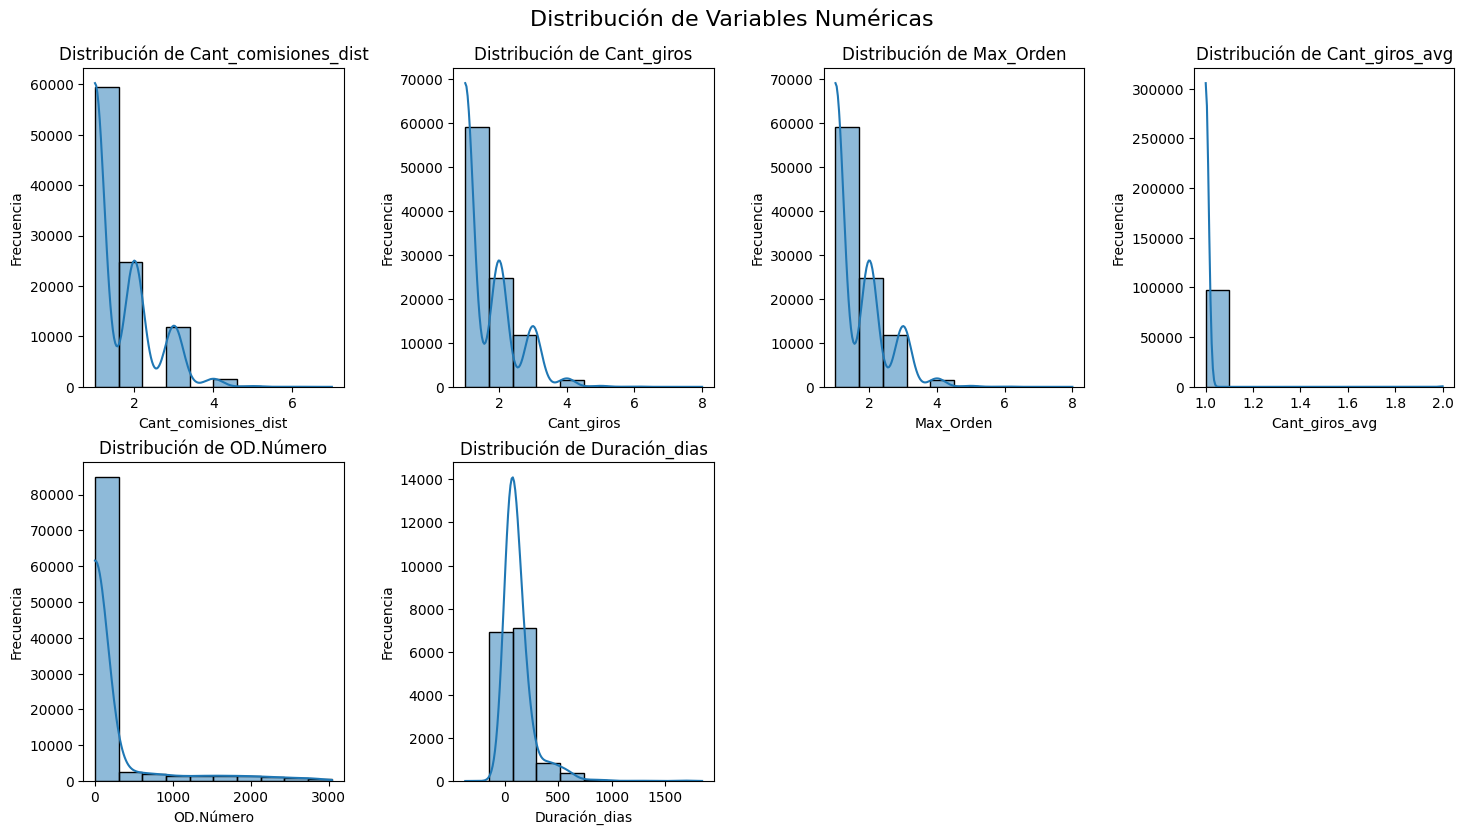

In [16]:
# Seleccionar solo las columnas numéricas
# columnas_numericas = proyecto_2009_2024_df.select_dtypes(include=[np.number]).columns
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html

# Calcular el número de filas y columnas para el subplot
#n = len(columnas_numericas)
columnas_numericas = ['Cant_comisiones_dist', 'Cant_giros', 'Max_Orden', 'Cant_giros_avg','OD.Número', 'Duración_dias']
nrows = 4
ncols = min(n, 4)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)


# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    #ax.hist(proyecto_2009_2024_df[col],bins=10,edgecolor='black',kde=True)
    sns.histplot(
   proyecto_2009_2024_df[col],
   kde=True,
   kde_kws=dict(bw_adjust=3),
   bins=10,
   ax=ax 
)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.2)

plt.show()



* La distribución normal, o distribución gaussiana, es una función que distribuye la lista de variables aleatorias en un gráfico que tiene forma de campana simétrica. Una distribución normal tiene una curva de densidad que es simétrica respecto de su media, con su dispersión definida típicamente por su desviación estándar. Tiene dos parámetros: la media y la desviación estándar.
* Distribución exponencial: Un proceso en el que algunos eventos ocurren de manera continua e independiente a una tasa promedio constante se denomina proceso puntual de Poisson.
* Distribución binomial: La distribución binomial, como sugiere su nombre, tiene solo dos resultados posibles: éxito o fracaso. Los resultados no necesitan ser igualmente probables y cada ensayo es independiente del otro.

**Asimetría(Skewness)**
* https://www.datacamp.com/es/tutorial/understanding-skewness-and-kurtosis
* https://es.wikipedia.org/wiki/
* https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm


En teoría de probabilidad y estadística, la asimetría es una medida de la asimetría de la variable en el conjunto de datos con respecto a su media. El valor de asimetría puede ser positivo o negativo, o indefinido.
El valor de asimetría nos indica si los datos están sesgados o son simétricos. 

* (-0,5, 0,5) - bajo o aproximadamente simétrico.
* (-1, -0,5) U (0,5, 1) - moderadamente sesgada.
* Más allá de -1 y 1 - Muy sesgado.

In [17]:
#scipy.stats.skew(dataset) 
# Otra fórmula muy influida por los trabajos de Karl Pearson es la fórmula basada en momentos para aproximar la asimetría. Es más fiable y se da de la siguiente manera
# https://www.datacamp.com/es/tutorial/understanding-skewness-and-kurtosis
proyecto_2009_2024_df[columnas_numericas].skew()

Cant_comisiones_dist     1.288062
Cant_giros               1.363433
Max_Orden                1.363433
Cant_giros_avg          23.569993
OD.Número                3.173510
Duración_dias            4.032590
dtype: float64

**Curtosis(Kurtosis)**

Es necesaria para comprender el concepto de curtosis.
Básicamente, la curtosis es una medida estadística que ilustra en qué medida las colas de una distribución difieren de las de una distribución normal. Esta técnica puede identificar si una distribución dada contiene valores extremos.

La asimetría mide típicamente la simetría de la distribución dada. Por otro lado, la curtosis mide la pesadez de las colas de la distribución.
La curtosis, a diferencia de la asimetría, no se trata de la agudeza o la planitud. Es la medida de la presencia de valores atípicos en una distribución dada. Tanto la curtosis alta como la baja son un indicador de que los datos necesitan una investigación más profunda. Cuanto mayor sea la curtosis, más altos serán los valores atípicos.


* Mesocúrtica: si cualquier conjunto de datos sigue una distribución normal, sigue una distribución mesocúrtica. Tiene una curtosis de alrededor de 0.
* Leptocúrtica: en este caso, la distribución tiene una curtosis mayor que 3 y las colas gruesas indican que la distribución produce más valores atípicos.
* Platicúrtica: en este caso, la distribución tiene una curtosis negativa y las colas son muy delgadas en comparación con la distribución normal.

In [18]:
#  la curtosis positiva indica una distribución de "cola pesada" y la curtosis negativa indica una distribución de "cola ligera".
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html 
#  exceso de curtosis
kurtosis = proyecto_2009_2024_df[columnas_numericas].kurt()
kurtosis

Cant_comisiones_dist      1.081579
Cant_giros                1.596571
Max_Orden                 1.596571
Cant_giros_avg          553.555886
OD.Número                 9.455417
Duración_dias            26.915825
dtype: float64

Cant_comisiones_dist, Cant_giros, Max_Orden asimétricas sesgada. Duración_dias asimétrica sesgada, cola pesada (presencia de valores atípicos). Cant_giros_avg  asimétrica sesgada, cola pesada (presencia de valores atípicos)

#### DISTRIBUCIÓN DE LAS VARIABLES CATEGÓRICAS Y NUMÉRICA DISCRETA 

In [19]:
# Para verificar que category conserva el NAN y Nan no es una categoria
# Ver https://pandas.pydata.org/docs/user_guide/categorical.html


#df = pd.DataFrame({"cat": [1,24,6,7], "s": ["a", "c", "c", np.nan]})
#display(df)
#df['s'] = df['s'].astype('category')
#display(df)
#df.info()
#df['s']

In [20]:
columnas_string = proyecto_2009_2024_df.select_dtypes(include=object).columns

In [21]:
columnas_string

Index(['Proyecto.ID', 'Título', 'Publicación.ID', 'Exp..Diputados', 'Tipo',
       'Cabecera', 'Dictamen.Tipo', 'Resultado'],
      dtype='object')

In [22]:
columnas_noContinua = ['Tipo', 'Dictamen.Tipo',
                       'Resultado','Tiene_info_movimiento',
                       'Proyecto_girado_a_comisiones_SALUD','Proyecto_SALUD'
                      ]

In [23]:
# Calcular cantidad de variables
n = len(columnas_string)
print("Cantidad de variables:{} ({}% de {} variables) ".format(n, round((n/proyecto_2009_2024_df.shape[1])*100,3), proyecto_2009_2024_df.shape[1] ))

# Mostrar
columnas_string

Cantidad de variables:8 (42.105% de 19 variables) 


Index(['Proyecto.ID', 'Título', 'Publicación.ID', 'Exp..Diputados', 'Tipo',
       'Cabecera', 'Dictamen.Tipo', 'Resultado'],
      dtype='object')

##### Controlar Tipo de datos y categorías. Transformar

In [24]:
#### Transformar Tipo de datos y controlar desbalance 

for col in columnas_string:
    
    categorias_ls = proyecto_2009_2024_df[col].unique()
    print('**** Variable {} ****\n *Cantidad de categorías identificadas (incluye valores faltantes):{} \n *Cantidad de categorías identificadas (sin valores faltantes):{}, \n {}\n \n '
          .format(col,len(categorias_ls),proyecto_2009_2024_df[col].nunique(),categorias_ls))
    
    # Transformar Tipo de object a category 
    proyecto_2009_2024_df[col] = proyecto_2009_2024_df[col].astype('category')
          

**** Variable Proyecto.ID ****
 *Cantidad de categorías identificadas (incluye valores faltantes):97742 
 *Cantidad de categorías identificadas (sin valores faltantes):97742, 
 ['HCDN280534' 'HCDN280537' 'HCDN280533' ... 'HCDN102514' 'HCDN102513'
 'HCDN102512']
 
 


C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\552761338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_2009_2024_df[col] = proyecto_2009_2024_df[col].astype('category')


**** Variable Título ****
 *Cantidad de categorías identificadas (incluye valores faltantes):94665 
 *Cantidad de categorías identificadas (sin valores faltantes):94665, 
 ['ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.'
 'PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.'
 'DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.'
 ...
 'SOLICITAR AL PODER EJECUTIVO A TRAVES DEL MINISTERIO DE ECONOMIA Y FINANZAS PUBLICAS, ARBITREN LAS MEDIDAS NECESARIAS PARA QUE LOS PLANES DE CANJES ANUNCIADOS CON FINES DE ALENTAR EL CONSUMO Y PRESERVAR EL EMPLEO, SEAN COMERCIALIZADOS EN TODO EL TERRITORIO NACIONAL.'
 'PEDIDO DE INFORMES AL PODER EJECUT

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\552761338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_2009_2024_df[col] = proyecto_2009_2024_df[col].astype('category')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\552761338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_2009_2024_df[col] = proyecto_2009_2024_df[col].astype('category')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\552761338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

**** Variable Publicación.ID ****
 *Cantidad de categorías identificadas (incluye valores faltantes):3240 
 *Cantidad de categorías identificadas (sin valores faltantes):3239, 
 ['HCDN142TP207' 'HCDN142TP206' 'HCDN142TP205' ... 'HCDN126TP187'
 'HCDN126TP186' 'HCDN126TP185']
 
 
**** Variable Exp..Diputados ****
 *Cantidad de categorías identificadas (incluye valores faltantes):97742 
 *Cantidad de categorías identificadas (sin valores faltantes):97742, 
 ['7465-D-2024' '7464-D-2024' '7463-D-2024' ... '6922-D-2008' '6921-D-2008'
 '6916-D-2008']
 
 
**** Variable Tipo ****
 *Cantidad de categorías identificadas (incluye valores faltantes):5 
 *Cantidad de categorías identificadas (sin valores faltantes):5, 
 ['LEY' 'DECLARACION' 'RESOLUCION' 'MENSAJE' 'MENSAJE Y PROYECTO DE LEY']
 
 
**** Variable Cabecera ****
 *Cantidad de categorías identificadas (incluye valores faltantes):205 
 *Cantidad de categorías identificadas (sin valores faltantes):205, 
 ['no hay valor indicado' 'cabecera' '

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\552761338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_2009_2024_df[col] = proyecto_2009_2024_df[col].astype('category')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\552761338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyecto_2009_2024_df[col] = proyecto_2009_2024_df[col].astype('category')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\552761338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

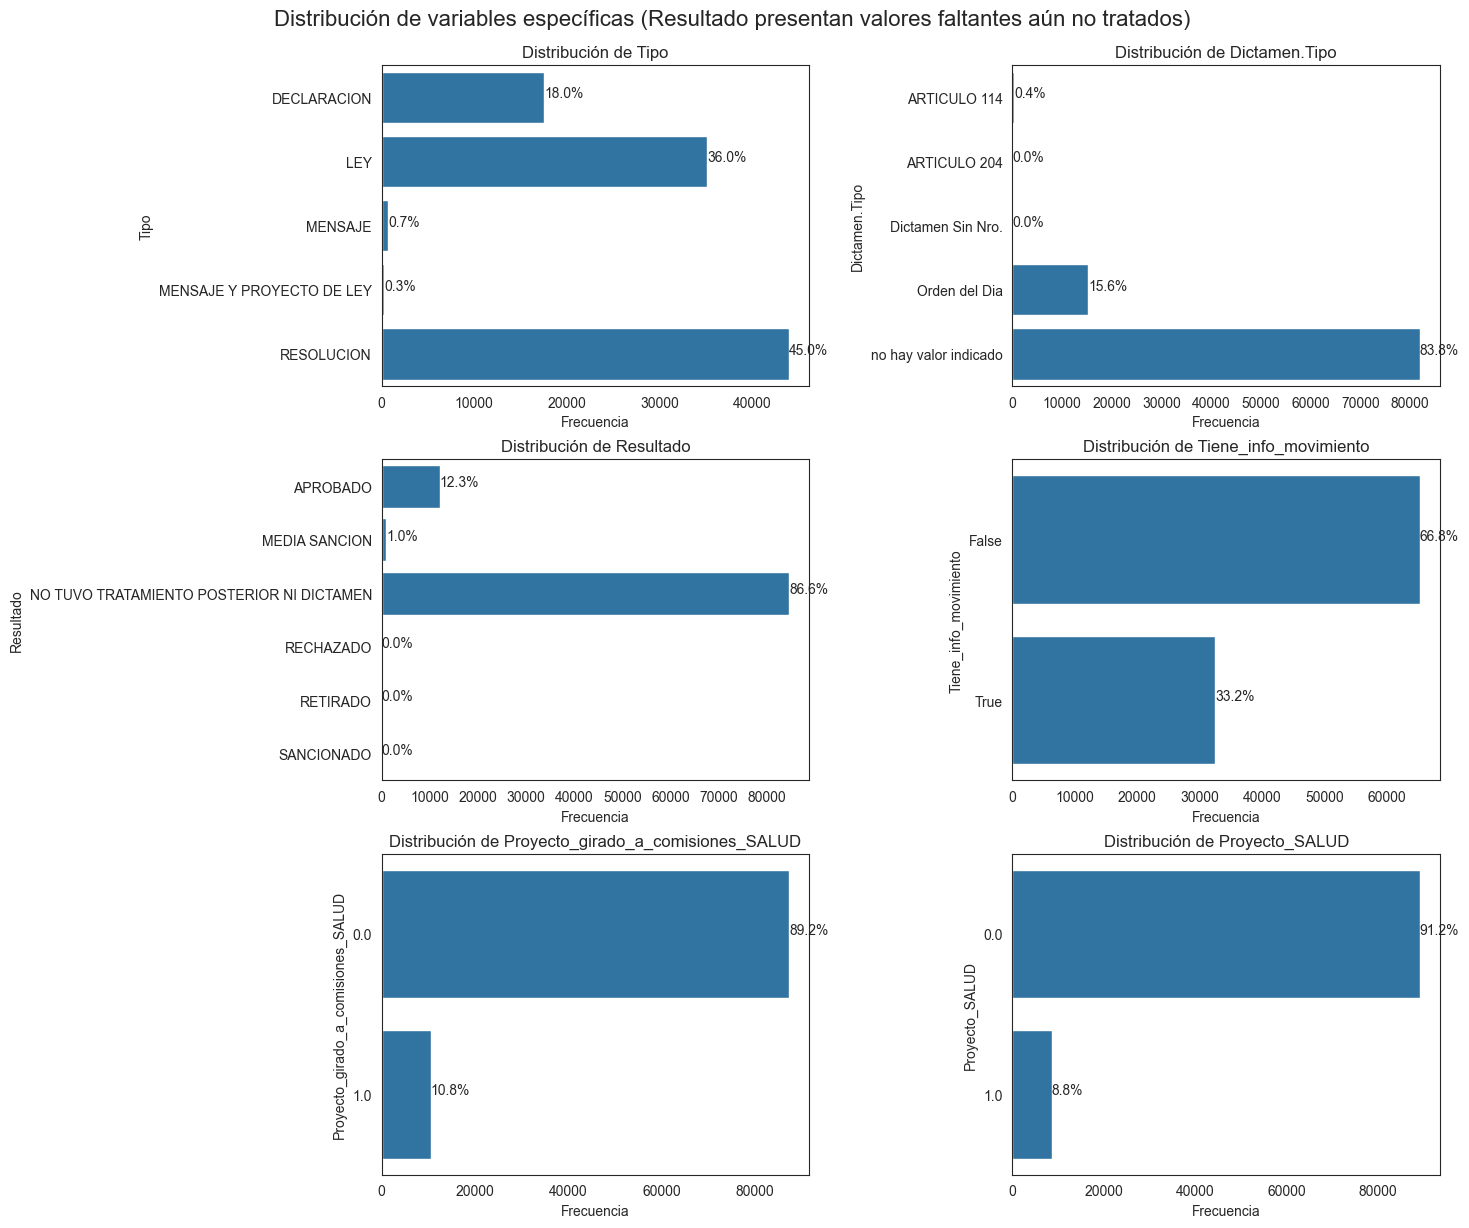

In [25]:
sns.set_style('white')

# Columnas categoricas

# Calcular el número de filas y columnas para el subplot
n = len(columnas_noContinua)
nrows = 4
ncols = min(n, 2)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de variables específicas (Resultado presentan valores faltantes aún no tratados)', fontsize=16)



# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]
total = proyecto_2009_2024_df.shape[0]

# Crear barras para cada variable categorica
for i, col in enumerate(columnas_noContinua):
    ax = axes[i]

    # Graficar
    sns.countplot(y=col, data=proyecto_2009_2024_df, ax = ax, stat = 'count', orient='h') # {‘count’, ‘percent’, ‘proportion’, ‘probability’} #  palette='colorblind',
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel(col)#
    #ax.tick_params("x", rotation=45)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
 
# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.2)
plt.show()

#### Proyectos con distintos identificadores (Proyecto.ID) pero con iguales títulos
* Variable Título 
    * Cantidad de categorías identificadas: 94665.
    * Hay duplicados 5654 


In [26]:
proyecto_2009_2024_df['Título'].describe()

count                             97742
unique                            94665
top       JUICIO POR JURADOS. CREACION.
freq                                 18
Name: Título, dtype: object

In [27]:
# Controlar duplicados de títulos sin preprocesamiento de texto
titulosdup_df = proyecto_2009_2024_df[proyecto_2009_2024_df.duplicated(['Título'],keep=False)]
print("Cantidad de duplicados de títulos:{} cantidad de proyectos ({}%)".format(titulosdup_df.shape[0], round((titulosdup_df.shape[0]/proyecto_2009_2024_df.shape[0])*100,2)))

Cantidad de duplicados de títulos:5654 cantidad de proyectos (5.78%)


In [28]:
# Ejemplos
titulosdup_df.sort_values(['Título']).head(2)

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Exp..Diputados,Tipo,Cant_comisiones_dist,Cant_giros,Max_Orden,Cant_giros_avg,Cabecera,Dictamen.Tipo,OD.Número,Resultado,Fecha_max,Duración_dias,Tiene_info_movimiento,Proyecto_girado_a_comisiones_SALUD,Proyecto_SALUD
50076,HCDN184198,"""AGENCIA FEDERAL DE INVESTIGACIONES SOBRE DELITOS COMPLEJOS - AFIDECO -"". CREACION EN EL AMBITO DEL MINISTERIO DE SEGURIDAD DE LA NACION.",2016-04-05,HCDN134TP024,1298-D-2016,LEY,3,3,3,1.0,no hay valor indicado,no hay valor indicado,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,NaT,NaN,False,0.0,0.0
60706,HCDN164917,"""AGENCIA FEDERAL DE INVESTIGACIONES SOBRE DELITOS COMPLEJOS - AFIDECO -"". CREACION EN EL AMBITO DEL MINISTERIO DE SEGURIDAD DE LA NACION.",2014-06-30,HCDN132TP076,5111-D-2014,LEY,3,3,3,1.0,no hay valor indicado,no hay valor indicado,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,NaT,NaN,True,0.0,0.0


(2577, 2)


,count
count,2577.000000
mean,2.194024
std,0.708475
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,18.000000


'Top 15 títulos más repetidos'

,Título,count
0,JUICIO POR JURADOS. CREACION.,18
1,"CONTRATO DE TRABAJO - LEY 20744 -. MODIFICACION DEL ARTICULO 158, SOBRE LICENCIAS ESPECIALES.",15
2,ACCESO A LA INFORMACION PUBLICA. REGIMEN.,10
3,"TRANSFERIR A TITULO GRATUITO UN INMUEBLE PROPIEDAD DEL ESTADO NACIONAL, A LA MUNICIPALIDAD DE PRESIDENCIA ROQUE SAENZ PEÑA, PROVINCIA DEL CHACO.",8
4,JUICIO POR JURADOS. REGIMEN.,8
5,"TRANSFERIR A TITULO GRATUITO A LA MUNICIPALIDAD DE PRESIDENCIA ROQUE SAENZ PEÑA, PROVINCIA DEL CHACO, EL DOMINIO DEL INMUEBLE PROPIEDAD DEL ESTADO NACIONAL.",8
6,"SISTEMA INTEGRADO DE JUBILACIONES Y PENSIONES - LEY 24241 -. MODIFICACION DEL ARTICULO 32, SOBRE MOVILIDAD DE LAS PRESTACIONES.",7
7,"EXPRESAR REPUDIO AL FALLO DE LA CORTE SUPREMA DE JUSTICIA DE LA NACION, EN EL CASO LUIS MUIÑA - EXPTE: ""BIGNONE, BENITO A. Y OTRO S/RECURSO EXTRAORDINARIO -"".",7
8,ALQUILERES - LEY 27551 -. DEROGACION.,6
9,"EXPRESAR PESAR POR EL FALLECIMIENTO DEL DIRECTOR DE CINE LEONARDO FAVIO, OCURRIDO EL DIA 5 DE NOVIEMBRE DE 2012.",6


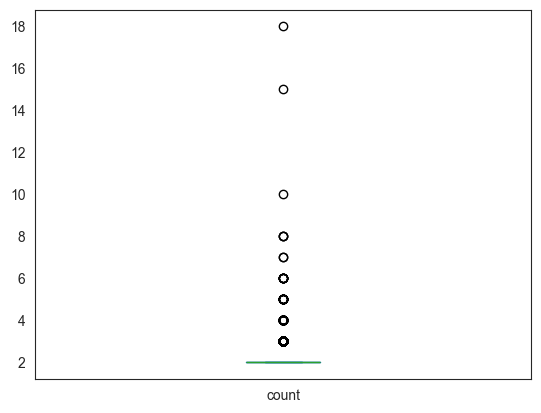

In [29]:
# Explorando los proyectos con diferentes ID pero con titulos iguales
Frec_titulos_df = titulosdup_df['Título'].value_counts().reset_index()
Frec_titulos_df = Frec_titulos_df[Frec_titulos_df['count']>0] # Al ser Tipo categorico considera en el value_counts reset_index todos las categorias que son 84421

# Estadística
print(Frec_titulos_df.shape)
display(Frec_titulos_df.describe())
display('Top 15 títulos más repetidos',Frec_titulos_df.head(15))
Frec_titulos_df['count'].plot(kind='box')
del Frec_titulos_df


Se podría crear 2 variables nuevas, una técnica (Proyecto_duplicado_Tit) y otra asociadas a existencia de proyecto anterior (Tiene_proyecto_anterior_igualTit)

#### DISTRIBUCIÓN DE LAS VARIABLES FECHAS
Al trabajar con datos de series temporales, se pueden observar varias características únicas. En general, las series temporales tienden a exhibir las siguientes características:
* Al observar datos de series temporales, es esencial ver si hay alguna tendencia.
* Observar una tendencia significa que los valores de medición promedio parecen disminuir o aumentar con el tiempo.
* Los datos de series temporales pueden contener una cantidad notable de valores atípicos. Estos valores atípicos se pueden notar cuando se representan en un gráfico.

Algunos datos de series temporales tienden a repetirse durante un cierto intervalo en algunos patrones. Nos referimos a estos patrones repetitivos como estacionalidad.

A veces, hay un cambio desigual en los datos de series temporales. Nos referimos a estos cambios desiguales como cambios abruptos. Observar cambios abruptos en series temporales es esencial ya que revela fenómenos subyacentes esenciales.


Algunas series tienden a seguir una variación constante a lo largo del tiempo. Por lo tanto, es esencial observar los datos de series temporales y ver si los datos exhiben o no una variación constante a lo largo del tiempo.

In [30]:
# Recordar tipos de variables
proyecto_2009_2024_df.dtypes

Proyecto.ID                                 category
Título                                      category
Publicación.Fecha                     datetime64[ns]
Publicación.ID                              category
Exp..Diputados                              category
Tipo                                        category
Cant_comisiones_dist                           int64
Cant_giros                                     int64
Max_Orden                                      int64
Cant_giros_avg                               float64
Cabecera                                    category
Dictamen.Tipo                               category
OD.Número                                    float64
Resultado                                   category
Fecha_max                             datetime64[ns]
Duración_dias                                float64
Tiene_info_movimiento                           bool
Proyecto_girado_a_comisiones_SALUD           float64
Proyecto_SALUD                               f

In [31]:
# 'datetime' 12 num + 9 categoricas + Tiene_info_movimiento (bool)
columnas_fechas = proyecto_2009_2024_df.select_dtypes(include='datetime').columns
columnas_fechas

Index(['Publicación.Fecha', 'Fecha_max'], dtype='object')

In [32]:
# Estadistica descriptiva
proyecto_2009_2024_df[columnas_fechas].describe()

,Publicación.Fecha,Fecha_max
count,97742,15324
mean,2016-07-30 09:50:53.860162304,2015-10-18 16:58:04.416601344
min,2009-01-05 00:00:00,2009-03-18 00:00:00
25%,2012-09-13 00:00:00,2012-06-13 18:00:00
50%,2016-05-23 00:00:00,2014-11-20 00:00:00
75%,2020-05-27 00:00:00,2018-10-29 00:00:00
max,2024-12-23 00:00:00,2024-11-27 00:00:00


La extracción de componentes es útil en los siguientes casos:
* Análisis temporal: si su análisis incluye patrones o tendencias que varían a lo largo de días, meses o años, la extracción de estos componentes facilita una exploración más centrada.
* Agrupación y agregación: al agrupar datos en función de patrones temporales, la extracción de componentes permite una fácil agregación y resumen.
* Análisis de series temporales: para el análisis de series temporales, desglosar los valores de fecha y hora en componentes
es esencial para comprender la estacionalidad y las tendencias.

In [33]:
# Analizamos Publicación.Fecha
publicacion_df = proyecto_2009_2024_df[['Proyecto.ID','Publicación.Fecha']].copy()
cant_fechas = len(proyecto_2009_2024_df['Publicación.Fecha'].unique())
print('Cantidad de fechas distintas:{} en una ventana de 15 años {}'.format(cant_fechas, cant_fechas/15))
publicacion_df['Años_mes'] = publicacion_df['Publicación.Fecha'].dt.to_period('m')
publicacion_df['Año'] = publicacion_df['Publicación.Fecha'].dt.year
publicacion_df['Mes'] = publicacion_df['Publicación.Fecha'].dt.month
publicacion_df['Nombre_dia_semana'] = publicacion_df['Publicación.Fecha'].dt.day_name()

# Analizar evento publicación con ID
publicacion_df = publicacion_df.sort_values('Publicación.Fecha')
publicacion_df['Tiempo_desde_public_anterior'] = publicacion_df['Publicación.Fecha'].diff().dt.days.fillna(0) # dias

publicacion_df = publicacion_df.sort_values('Proyecto.ID')
publicacion_df['Tiempo_desde_Proyecto.ID_anterior'] = publicacion_df['Publicación.Fecha'].diff().dt.days.fillna(0) # dias
publicacion_df = publicacion_df.set_index('Publicación.Fecha')

# ID

publicacion_df['ID'] = publicacion_df['Proyecto.ID'].str.replace('[^\d\.]','', regex=True).astype(int)
publicacion_df = publicacion_df.sort_values('ID')
publicacion_df['Diferencia_ID'] =  publicacion_df['ID'].diff().fillna(0)

publicacion_df.describe(include='all')

Cantidad de fechas distintas:3310 en una ventana de 15 años 220.66666666666666


C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\1759079875.py:5: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  publicacion_df['Años_mes'] = publicacion_df['Publicación.Fecha'].dt.to_period('m')


,Proyecto.ID,Años_mes,Año,Mes,Nombre_dia_semana,Tiempo_desde_public_anterior,Tiempo_desde_Proyecto.ID_anterior,ID,Diferencia_ID
count,97742,97742,97742.000000,97742.000000,97742,97742.000000,97742.000000,97742.000000,97742.000000
unique,97742,191,NaN,NaN,7,NaN,NaN,NaN,NaN
top,HCDN102489,2012-03,NaN,NaN,Wednesday,NaN,NaN,NaN,NaN
freq,1,1550,NaN,NaN,23479,NaN,NaN,NaN,NaN
mean,NaN,NaN,2016.099364,6.317458,NaN,0.059657,0.059626,190397.077940,1.821612
std,NaN,NaN,4.482432,2.909684,NaN,0.495415,15.005449,53706.041056,17.165867
min,NaN,NaN,2009.000000,1.000000,NaN,0.000000,-1847.000000,102489.000000,0.000000
25%,NaN,NaN,2012.000000,4.000000,NaN,0.000000,0.000000,141730.250000,1.000000
50%,NaN,NaN,2016.000000,6.000000,NaN,0.000000,0.000000,186241.500000,1.000000
75%,NaN,NaN,2020.000000,9.000000,NaN,0.000000,0.000000,240981.750000,1.000000


Si se pregunta cuándo es una buena idea considerar agregar algunas diferencias de tiempo en su flujo de trabajo de datos, lea lo siguiente:
* Análisis basado en el tiempo: el cálculo de las diferencias de tiempo permite analizar la duración entre eventos o marcas de tiempo. Ayuda a cuantificar el tiempo que se tarda en diferentes procesos, actividades o intervalos.
* Medición del rendimiento: al medir la duración de las tareas o eventos, puede evaluar métricas de rendimiento, como el tiempo de respuesta, el tiempo de procesamiento o el tiempo que se tarda en completar una operación. Esta información puede guiar los esfuerzos de optimización e identificar áreas de mejora.
* Secuencia de eventos: al comparar las marcas de tiempo, puede determinar el orden cronológico en el que ocurrieron los eventos. Esta secuencia lo ayuda a comprender las relaciones entre los eventos y sus dependencias.
* Monitoreo del acuerdo de nivel de servicio (SLA): las diferencias de tiempo son útiles para el monitoreo del SLA. Al comparar las marcas de tiempo relacionadas con las métricas del SLA, como el tiempo de respuesta o el tiempo de resolución, puede garantizar el cumplimiento de los niveles de servicio acordados. El monitoreo de las diferencias horarias ayuda a identificar infracciones del SLA y tomar las medidas adecuadas.

In [34]:
publicacion_df.sort_values('Proyecto.ID').head(5)

,Proyecto.ID,Años_mes,Año,Mes,Nombre_dia_semana,Tiempo_desde_public_anterior,Tiempo_desde_Proyecto.ID_anterior,ID,Diferencia_ID
Publicación.Fecha,,,,,,,,,
2009-01-08,HCDN102489,2009-01,2009,1,Thursday,3.0,0.0,102489,0.0
2009-01-08,HCDN102490,2009-01,2009,1,Thursday,0.0,0.0,102490,1.0
2009-02-04,HCDN102491,2009-02,2009,2,Wednesday,0.0,27.0,102491,1.0
2009-02-04,HCDN102492,2009-02,2009,2,Wednesday,0.0,0.0,102492,1.0
2009-02-04,HCDN102493,2009-02,2009,2,Wednesday,0.0,0.0,102493,1.0


In [35]:
publicacion_df.sort_values('Proyecto.ID').tail(5)

,Proyecto.ID,Años_mes,Año,Mes,Nombre_dia_semana,Tiempo_desde_public_anterior,Tiempo_desde_Proyecto.ID_anterior,ID,Diferencia_ID
Publicación.Fecha,,,,,,,,,
2024-12-23,HCDN280533,2024-12,2024,12,Monday,0.0,0.0,280533,1.0
2024-12-23,HCDN280534,2024-12,2024,12,Monday,0.0,0.0,280534,1.0
2024-12-23,HCDN280535,2024-12,2024,12,Monday,0.0,0.0,280535,1.0
2024-12-23,HCDN280536,2024-12,2024,12,Monday,0.0,0.0,280536,1.0
2024-12-23,HCDN280537,2024-12,2024,12,Monday,0.0,0.0,280537,1.0


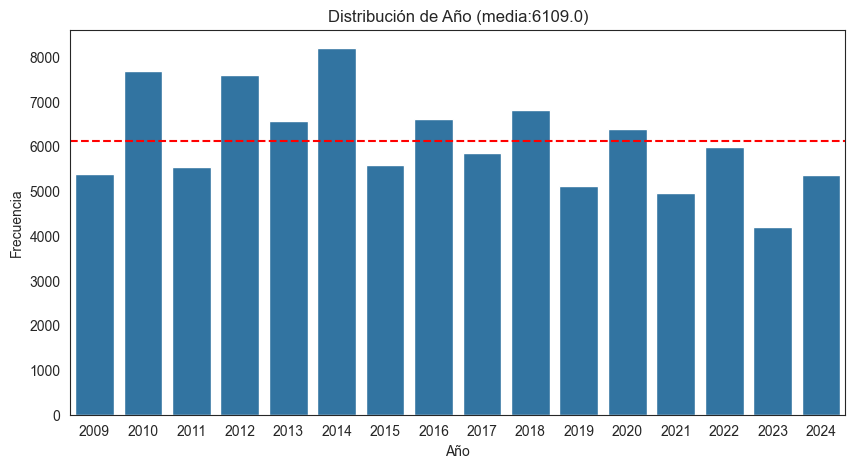

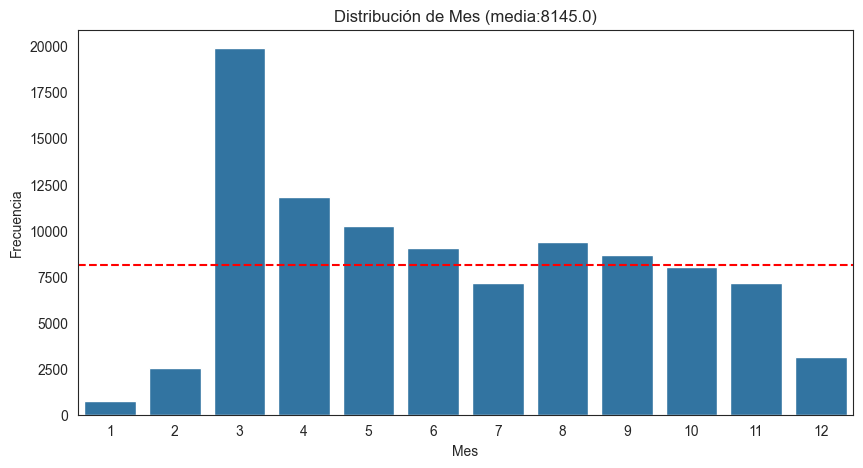

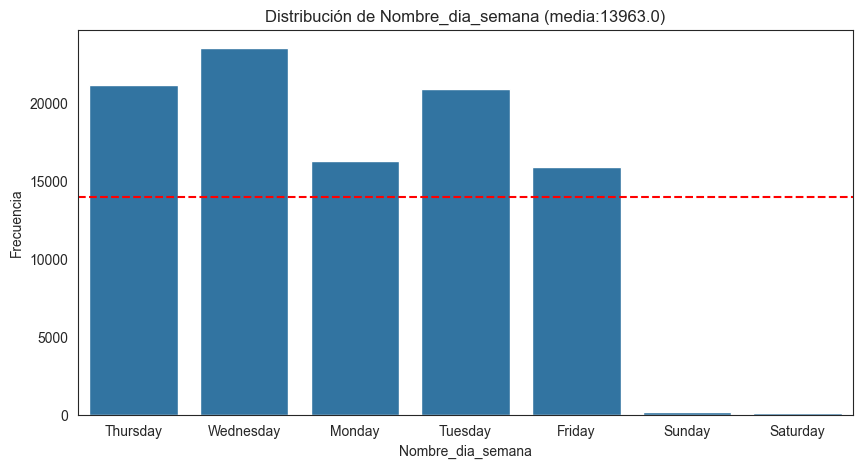

In [36]:
columnas = ['Año', 'Mes', 'Nombre_dia_semana']
for col in columnas :
    fig = plt.subplots(1,1, figsize=(10, 5))
    ax = sns.countplot(x= col,data=publicacion_df, stat = 'count')
    mean = publicacion_df[col].value_counts().mean()
    ax. axhline(y= mean, color='r', linestyle='--')
    ax.set_title(f'Distribución de {col} (media:{round(mean,0)})')
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel(col)#

* https://www.hcdn.gob.ar/sesiones/

  
**Sesiones**

Reunión plenaria formal de los diputados que se lleva a cabo en el Recinto, cumpliendo los procedimientos que fija el Reglamento de la H.C.D.N.

Existen distintos tipos de sesiones según el objeto perseguido, las condiciones o el momento en que se realicen.
* Ordinarias: las que se llevan a cabo durante el período ordinario de sesiones que se extiende desde el 1 de marzo al 30 de noviembre. Pueden ser de Tablas o Especiales, según estén dentro o fuera de los días y horarios fijados para sesionar.
* Extraordinarias: las que se llevan a cabo fuera del periodo ordinario y son convocadas por el PE.
Especiales: aquellas que se celebran a pedido de los/las diputados/as fuera de los días y horarios fijados para las sesiones de tablas.
* Informativas: la que se lleva a cabo con la presencia del Jefe de Gabinete de Ministros cuando concurre a brindar el informe, según lo establece la Constitución Nacional.
* Asambleas Legislativas: reunión conjunta de senadores y diputados. Casos: apertura de las sesiones ordinarias con la presencia del presidente de la Nación; y también se puede convocar cuando mandatarios extranjeros visitan el Congreso.

Ver períodos: https://www2.hcdn.gob.ar/export/hcdn/secparl/dgral_info_parlamentaria/dip/archivos/Estadistica_leyes_83-23.pdf


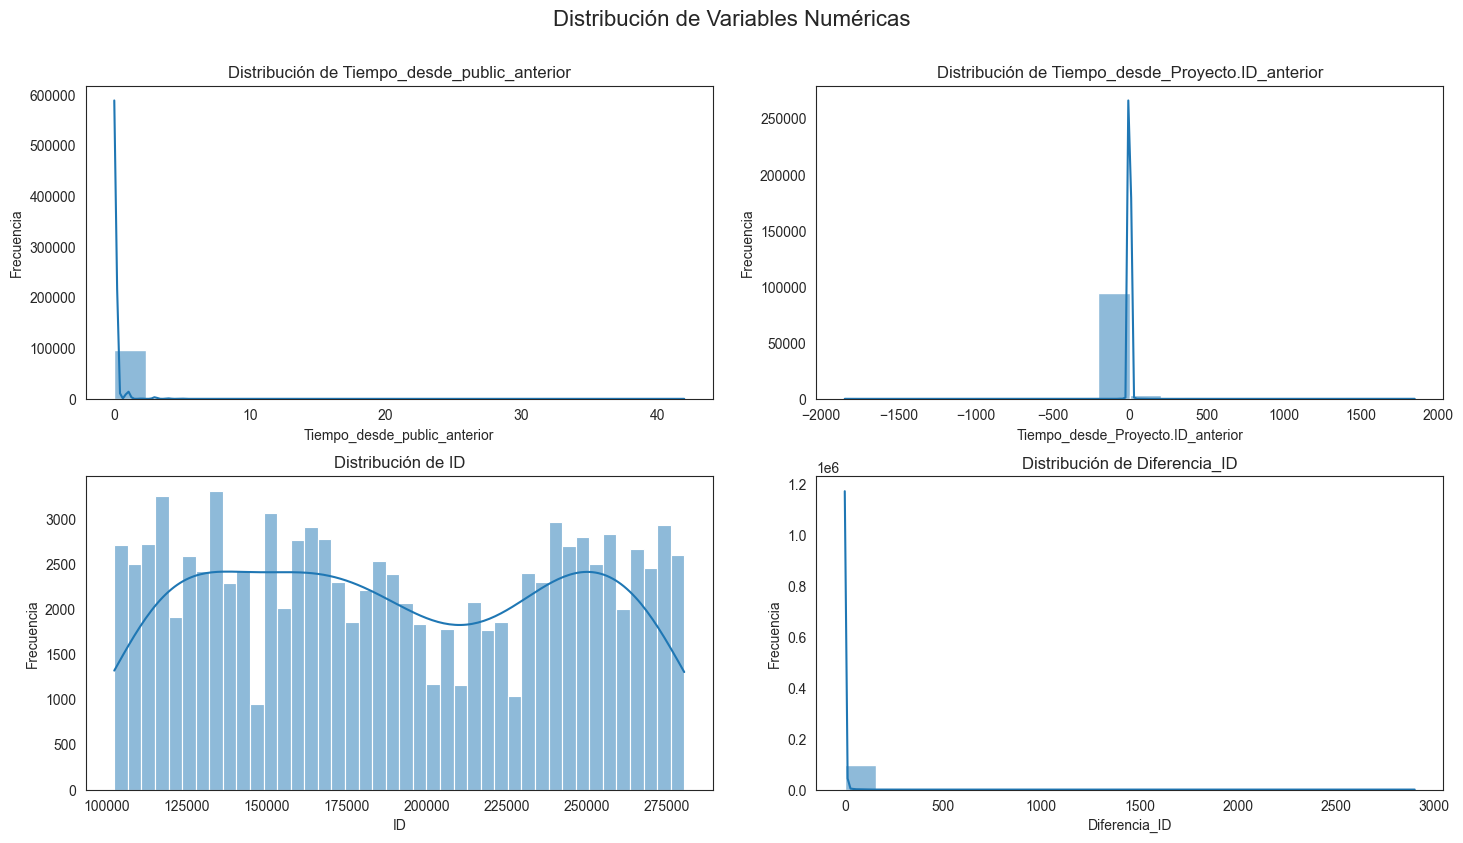

In [37]:
# Calcular el número de filas y columnas para el subplot
# publicacion_df.select_dtypes(include=[np.number]).columns
#https://www.analyticslane.com/2022/02/25/calcular-el-numero-optimo-de-bins-para-un-histograma/
# https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

columnas_numericas2 =  ['Tiempo_desde_public_anterior', 'Tiempo_desde_Proyecto.ID_anterior', 'ID', 'Diferencia_ID']

n = len(columnas_numericas2)
nrows = 2
ncols = 2 #min(n, 2)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)


# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas2):
    ax = axes[i]
    #ax.hist(proyecto_2009_2024_df[col],bins=10,edgecolor='black',kde=True)
    sns.histplot(
   publicacion_df[col],
   kde=True,
   kde_kws=dict(bw_adjust=3),
   bins='auto',
   ax=ax 
)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.2)

plt.show()

In [38]:
proyecto_2009_2024_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Publicación.Fecha,97742,2016-07-30 09:50:53.860162304,2009-01-05 00:00:00,2012-09-13 00:00:00,2016-05-23 00:00:00,2020-05-27 00:00:00,2024-12-23 00:00:00,NaN
Cant_comisiones_dist,97742.0,1.552946,1.0,1.0,1.0,2.0,7.0,0.782984
Cant_giros,97742.0,1.557693,1.0,1.0,1.0,2.0,8.0,0.794134
Max_Orden,97742.0,1.557693,1.0,1.0,1.0,2.0,8.0,0.794134
Cant_giros_avg,97742.0,1.00179,1.0,1.0,1.0,1.0,2.0,0.042276
OD.Número,97742.0,189.996041,0.0,0.0,0.0,0.0,3043.0,549.823682
Fecha_max,15324,2015-10-18 16:58:04.416601344,2009-03-18 00:00:00,2012-06-13 18:00:00,2014-11-20 00:00:00,2018-10-29 00:00:00,2024-11-27 00:00:00,NaN
Duración_dias,15324.0,128.622096,-367.0,48.0,83.0,152.0,1842.0,149.975922
Proyecto_girado_a_comisiones_SALUD,97742.0,0.107538,0.0,0.0,0.0,0.0,1.0,0.309798
Proyecto_SALUD,97742.0,0.087987,0.0,0.0,0.0,0.0,1.0,0.283277


### Valores atípicos univariado

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def seleccionar_outliers(df, col):
    """
    Selecciona y devuelve los outliers de un DataFrame según el método del IQR.

    Parámetros:
        df (pd.DataFrame): El DataFrame de entrada.
        columnas (string): Nombre de columna numérica a analizar.

    Retorna:
        df_outliers (pd.DataFrame): Subconjunto del DataFrame con los outliers.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Detectar outliers para esa columna
    condicion_col = (df[col] < limite_inferior) | (df[col] > limite_superior)
    # Filtrar solo los outliers
    df_outliers = df[condicion_col]

    return df_outliers

def detectar_y_eliminar_outliers(df, columnas):
    """
    Detecta y elimina outliers usando el método del IQR en las columnas especificadas.
    
    Parámetros:
        df (pd.DataFrame): El DataFrame de entrada.
        columnas (list): Lista de nombres de columnas numéricas a procesar.

    Retorna:
        df_limpio (pd.DataFrame): DataFrame sin outliers en las columnas seleccionadas.
    """
    df_limpio = df.copy()
    
    for col in columnas:
        Q1 = df_limpio[col].quantile(0.25)
        Q3 = df_limpio[col].quantile(0.75)
        IQR = Q3 - Q1
        
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar los datos que están dentro de los límites
        df_limpio = df_limpio[(df_limpio[col] >= limite_inferior) & (df_limpio[col] <= limite_superior)]

    return df_limpio

def boxplot_columnas(df, columnas, titulo='Boxplot sin outliers'):
    """
    Genera un boxplot para las columnas especificadas.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[columnas])
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [40]:
columnas_numericas = proyecto_2009_2024_df.select_dtypes(include=[np.number]).columns

In [41]:
columnas_numericas = ['Cant_comisiones_dist', 'Cant_giros', 'Max_Orden', 'Cant_giros_avg']

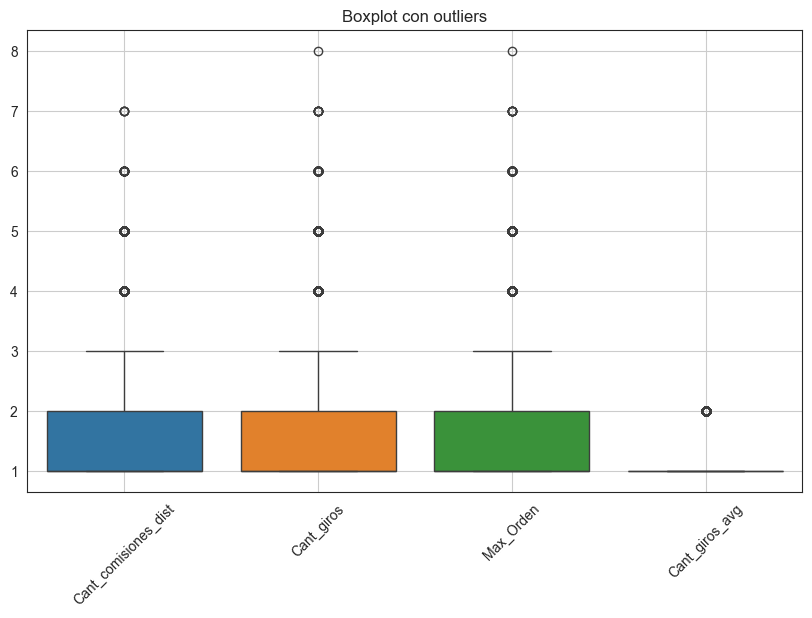

In [42]:
boxplot_columnas(proyecto_2009_2024_df, columnas_numericas, titulo='Boxplot con outliers')

In [43]:
#boxplot_columnas(proyecto_2009_2024_df, ['OD.Número', 'Duración_dias'], titulo='Boxplot con outliers')

In [44]:
#boxplot_columnas(publicacion_df, ['Tiempo_desde_public_anterior', 'Tiempo_desde_Proyecto.ID_anterior','Diferencia_ID'], titulo='Boxplot con outliers')
#plt.figure(figsize=(10, 6))
#sns.boxplot(data=publicacion_df['Tiempo_desde_Proyecto.ID_anterior'])

#### ANALISIS UNIVARIADO

El análisis univariante es la forma más sencilla de analizar datos. Significa que nuestros datos tienen un solo Tipo de variable y que realizamos un análisis sobre ella. El objetivo principal del análisis univariante es tomar datos, resumirlos y encontrar patrones entre los valores. No se ocupa de las causas ni de las relaciones entre los valores. Varias técnicas que describen los patrones encontrados en los datos univariados incluyen la tendencia central (es decir, la media, la moda y la mediana) y la dispersión (es decir, el rango, la varianza, los cuartiles máximo y mínimo (incluido el rango intercuartil) y la desviación estándar).

* 97742 proyectos publicados entre 2009-2024.
* Hay valores faltantes que fueron imputados.
	* Las variables indicadores de datos faltantes asociadas a la fuente de datos 'Resultado' presentan valores faltantes. Eso indica que no existe información para esos proyectos. Podrían considerarse junto a los proyectos con resultado 'NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN'. Determinar si la falta de datos esta asociado a un patrón, como Tipo de proyecto, fecha.


* Las variables asociadas a series temporales para analizar el estado de los proyectos (resultado) presentan alto porcentage de valores faltantes. Muy mala calidad
OD.Publicación , Fecha y Fecha_max (creada para tomar la fecha máxima registrada OD.Publicación , Fecha)

* Hay variables númericas. Ninguna simétrica, ni con distribución normal. 

* Hay variables categóricas	
	* Se observa desbalance entre las categorías de las variables. Sobre todo en 'Dictamen.Tipo'.
		* Habrá que controlar esto o unificar categorías en base al interés de estudio.
	* Hay proyectos con distintos 'Proyecto.ID' pero con iguales Titulos. 
Se podría crear 2 variables nuevas, una técnica (Proyecto_duplicado_Tit) y otra asociadas a existencia de proyecto anterior (Tiene_proyecto_anterior_igualTit).

* Hay valores atípicos en  Cant_comisiones_dist, Cant_giros, Max_Orden

        
* 4 variables de series temporales
	* 'Publicación.Fecha' no tiene valores faltantes. Atributo clave para seleccionar proyectos.
        * por Año: media 6109 proyectos. Años arriba de media 2010, 2012, 2013, 2014,2016,2018,2020
		* por mes: media: 8145. Moda Marzo. Debajo de la media Enero, Feb, Jul, Oct, Nov, Dic. Ver cuando se sesiona. Se observa patrón inicia fuerte Marzo a Junio,julio baja, Agosto sube y baja Oct.
		* por dia de semana: Moda Míercoles. sube y baja. Ver:¿No se trabaja en general sábado y domingo?.
        * Siguiendo el orden de ID, hay proyectos que se publicaron sin respetar el orden de asignación de ID
        * Cuidado con fecha de publicación
        *  La media de diferencia de ID de proyecto con su anterior es 1,83 , aunque su desvio estandar es de 17,16 ID. Se observa valores extremos. Rango 2901. El hecho que hay grandes diferencias de ID que significa? Que hay proyectos no registrados y/o digitalizados?
       

#### ANALISIS BIVARIADO
Como sugiere su nombre, se trata del análisis de más de un Tipo de variable (es decir, exactamente dos). El análisis bivariado se utiliza para averiguar si existe una relación entre dos variables diferentes. Cuando creamos un diagrama de dispersión al trazar una variable frente a otra en un plano cartesiano (piense en los ejes x e y), nos da una idea de lo que los datos intentan decirnos. Si los puntos de datos parecen encajar en la línea o curva, entonces existe una relación o correlación entre las dos variables. En general, el análisis bivariado nos ayuda a predecir un valor para una variable (es decir, una variable dependiente) si conocemos el valor de la variable independiente.

In [45]:
columnas_numericas = proyecto_2009_2024_df.select_dtypes(include=[np.number]).columns

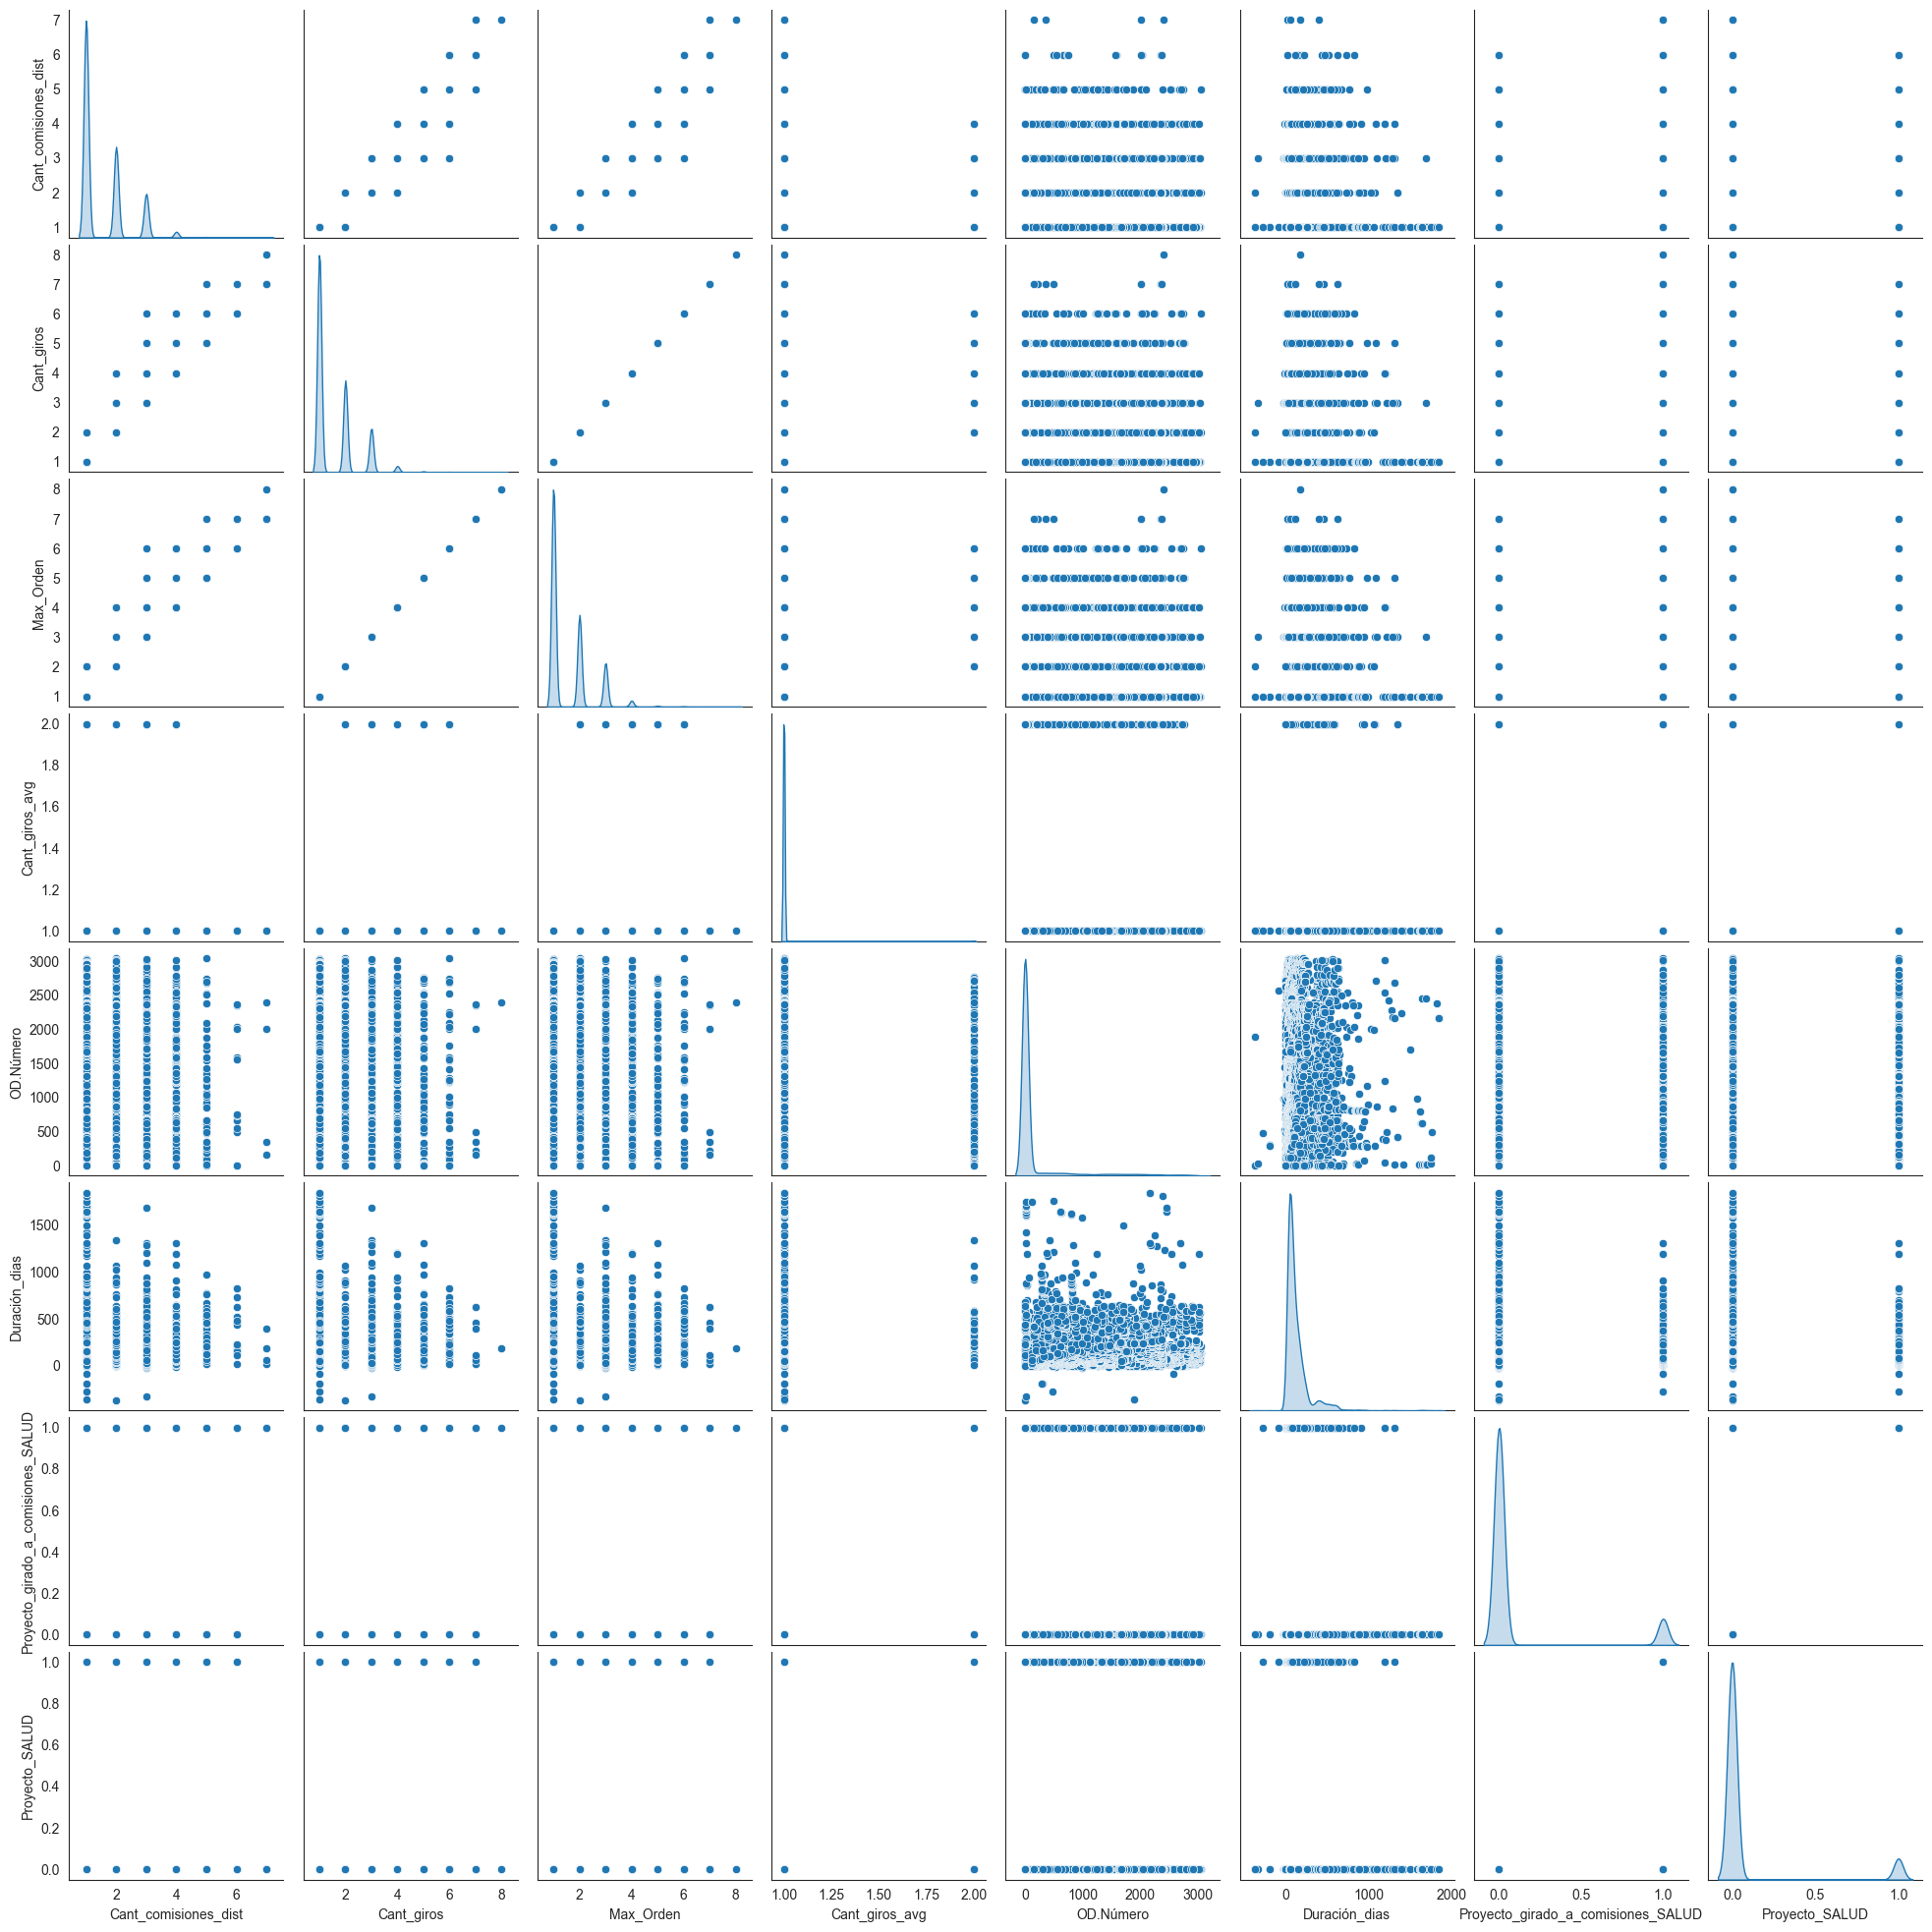

In [46]:
sns.pairplot(proyecto_2009_2024_df[columnas_numericas], diag_kind="kde")


<Axes: >

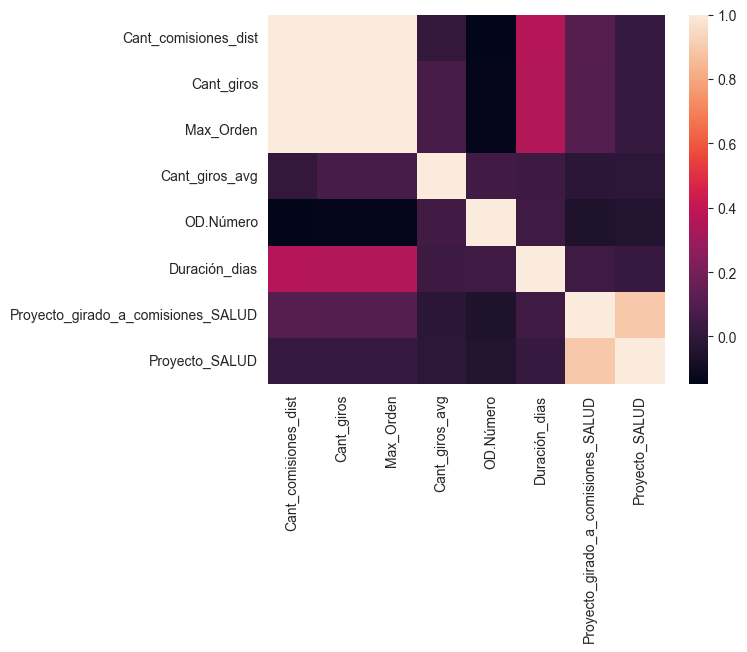

In [47]:
# Correlación
correlaccion = proyecto_2009_2024_df[columnas_numericas].corr(method='pearson')
sns.heatmap(correlaccion,xticklabels=correlaccion.columns,
yticklabels=correlaccion.columns)


* Se verifica que hay correlación entre las variables asociadas a giro de comisión pero no asi con cant_giro_avg.

**Ver relación con variables categóricas con Max_orden, duración_meses, OD.Número**

In [48]:
proyecto_2009_2024_df.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Cant_comisiones_dist', 'Cant_giros',
       'Max_Orden', 'Cant_giros_avg', 'Cabecera', 'Dictamen.Tipo', 'OD.Número',
       'Resultado', 'Fecha_max', 'Duración_dias', 'Tiene_info_movimiento',
       'Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD'],
      dtype='object')

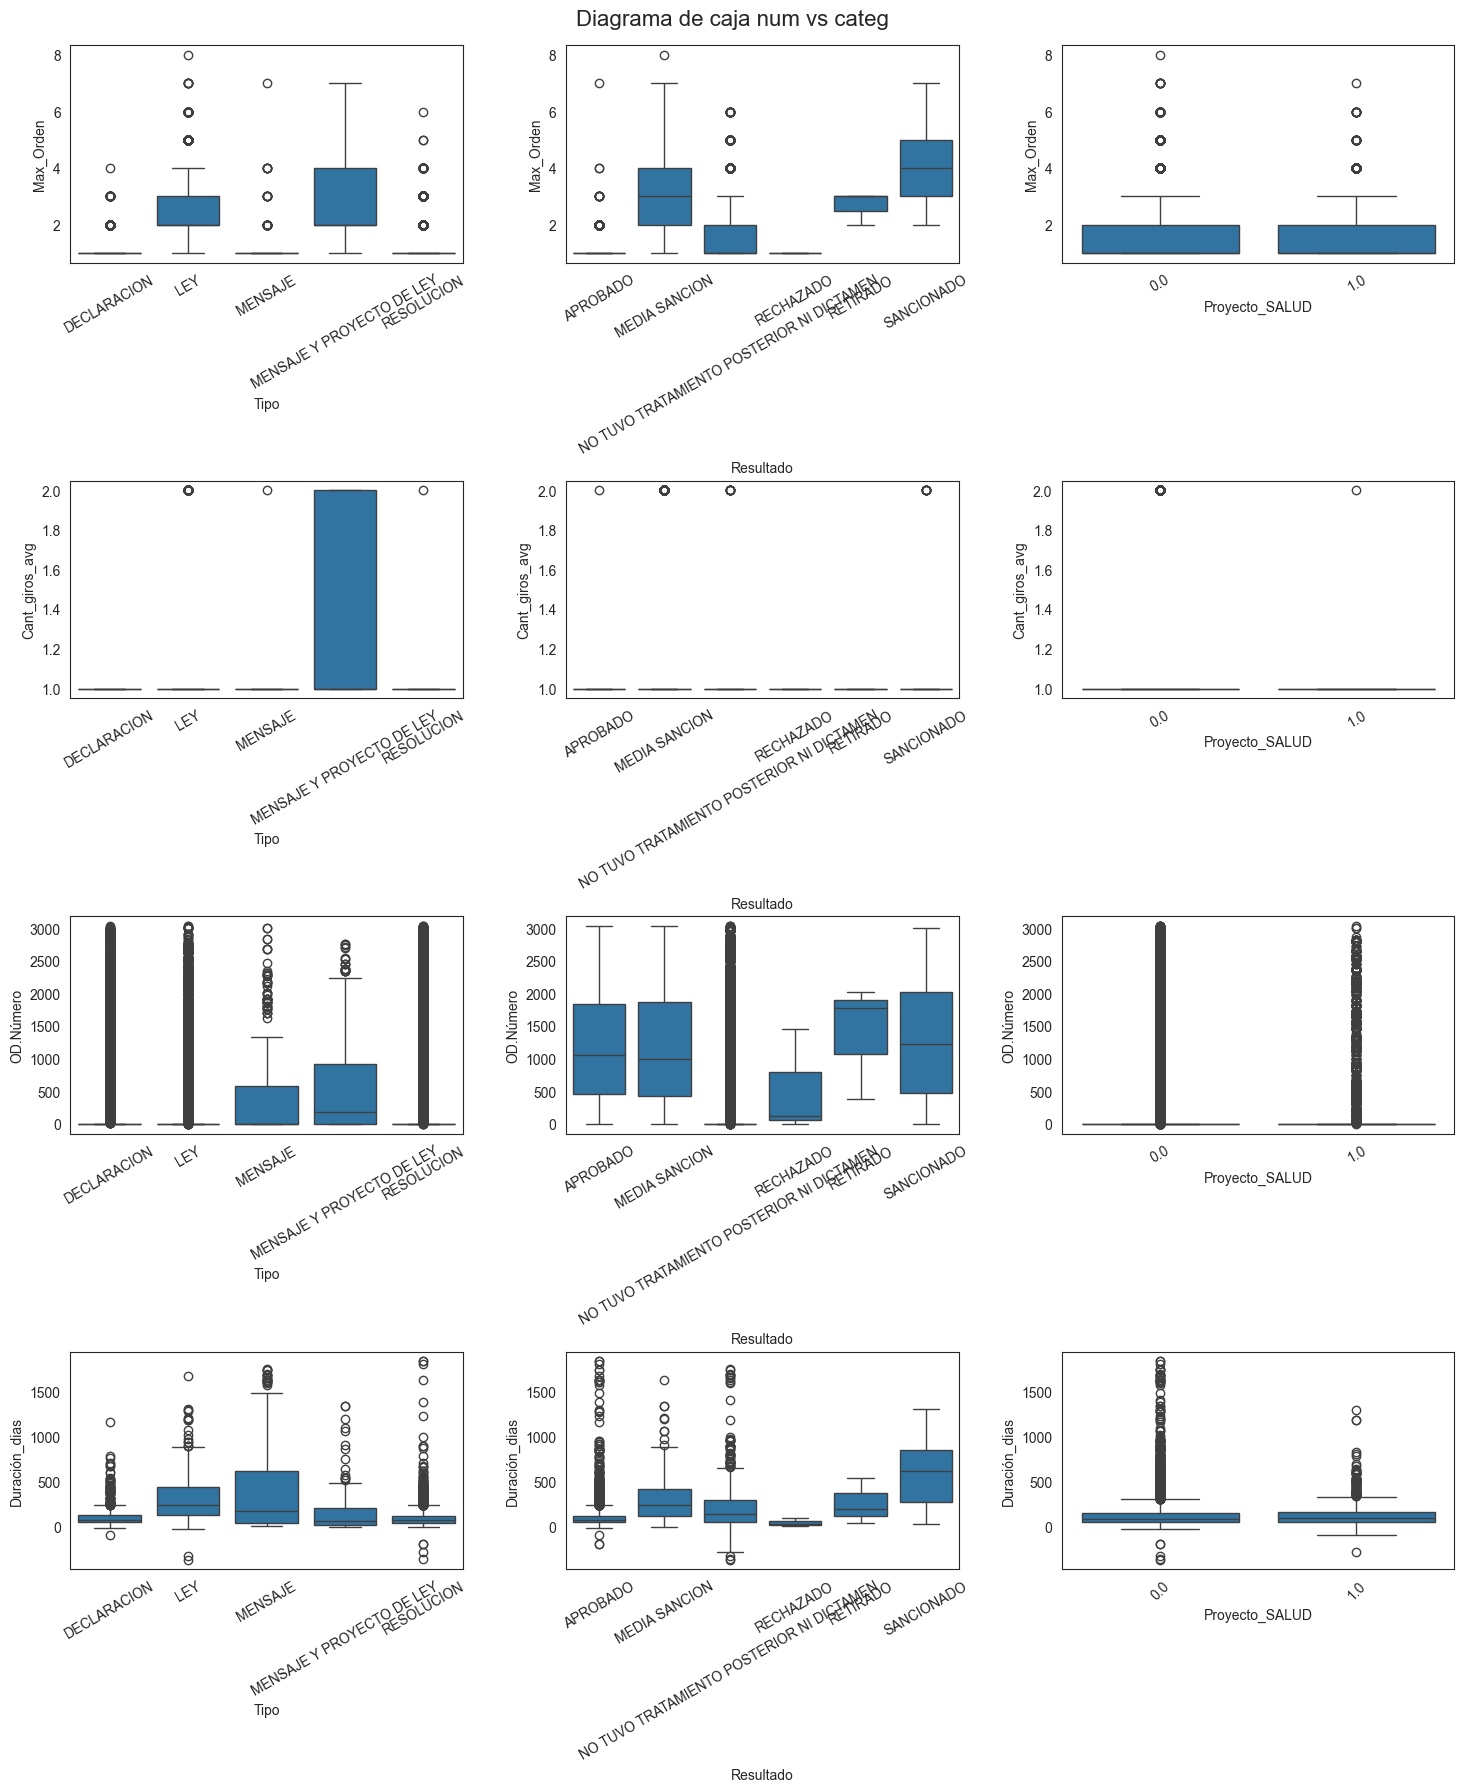

In [49]:

# Seleccionar solo las columnas numéricas
# columnas_numericas = proyecto_2009_2024_df.select_dtypes(include=[np.number]).columns
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html

col_num = ['Max_Orden','Cant_giros_avg','OD.Número','Duración_dias']
col_categ = ['Tipo','Resultado','Proyecto_SALUD'] # 'Proyecto_girado_a_comisiones_SALUD'
# Calcular el número de filas y columnas para el subplot
n = len(col_num)
nrows = 4
ncols = 3

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows)) # sharex = True
fig.suptitle('Diagrama de caja num vs categ', fontsize=16)


# Aplanar el array de ejes en caso de que sea 2D
# axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, r in enumerate(col_num):
    for j, c in enumerate(col_categ):
        ax = axes[i,j]
        #ax.hist(proyecto_2009_2024_df[col],bins=10,edgecolor='black',kde=True)
        box = sns.boxplot(
        y = r,
        x = c,
        data = proyecto_2009_2024_df,
        ax = ax 
        )
        #ax.set_title(f'Distribución de {col}')
        ax.set_xlabel(c)
        ax.set_ylabel(r)
        ax.xaxis.set_tick_params(rotation=30)



# Ocultar subplots vacíos si los hay
#for j in range(i+1, len(axes)):
#    fig.delaxes(axes[j])


plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=45)
plt.show()



* Proyecto_SALUD no presenta compartamiento diferencial por duración_meses, OD.Número, Max_orden.
* Existen comportamiento diferencial entre Tipo y Resultado y las variables númericas duración_meses, OD.Número, Max_orden.
*  Hay valores atípicos en duración_meses, OD.Número, Max_orden.

#### ANALISIS MULTIVARIADO
El análisis multivariado es el análisis de tres o más variables. Esto nos permite observar las correlaciones (es decir, cómo cambia una variable con respecto a otra) e intentar hacer predicciones para el comportamiento futuro con mayor precisión que con el análisis bivariado. Inicialmente, exploramos la visualización del análisis univariado y el análisis bivariado; de la misma manera, visualicemos el concepto de análisis multivariado.

Una forma común de representar gráficamente datos multivariados es hacer un diagrama de dispersión matricial, conocido como diagrama de pares. Un diagrama matricial o diagrama de pares muestra cada par de variables graficadas una contra la otra.
El diagrama de pares nos permite ver tanto la distribución de variables individuales como las relaciones entre dos variables:

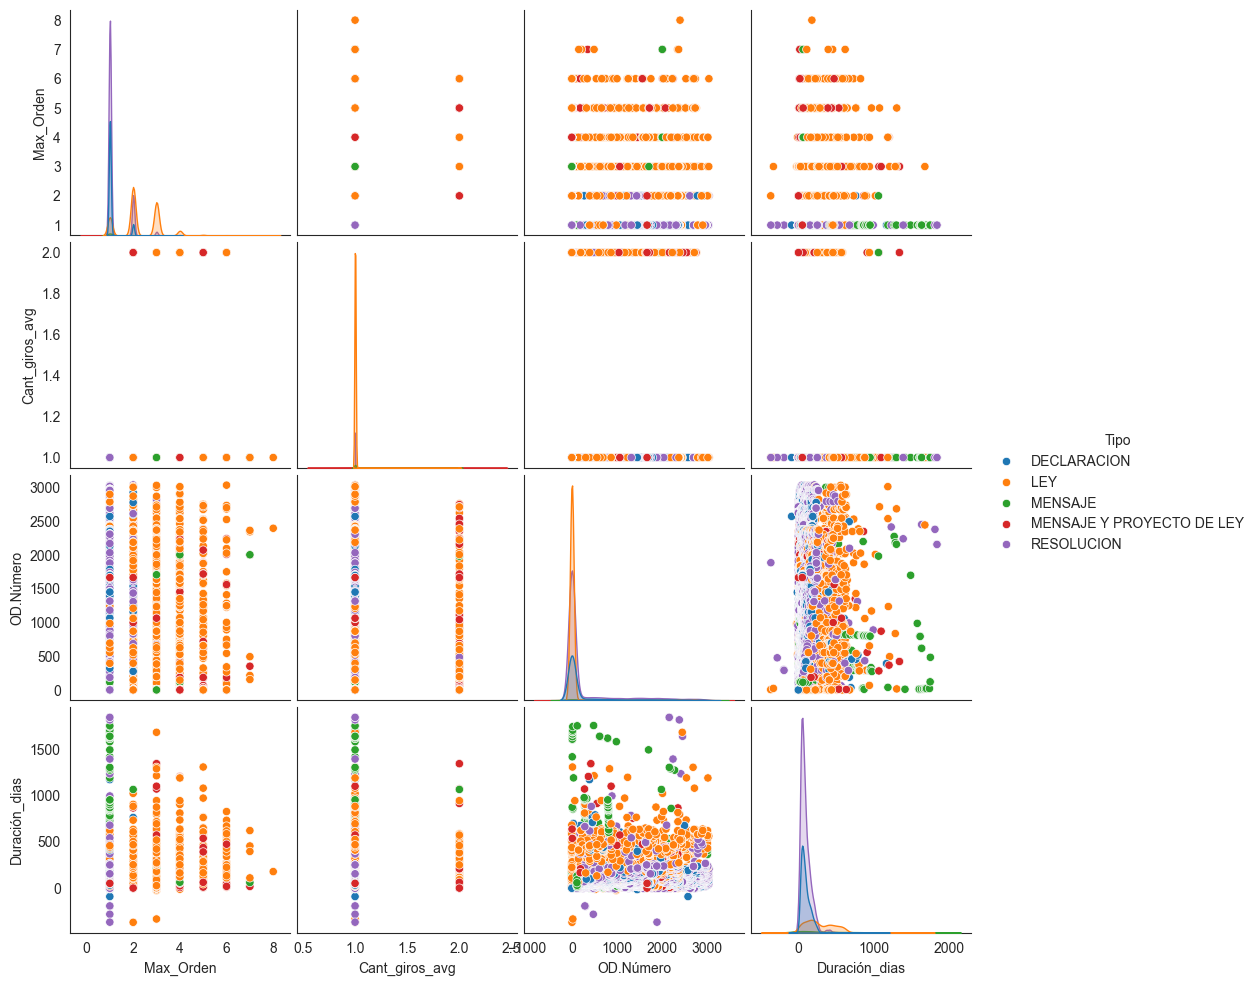

In [50]:
sns.pairplot(data=proyecto_2009_2024_df[col_num + ['Tipo']], hue='Tipo',  diag_kind="kde")


* No se observa relación lineal entre Max_orden y duración_meses
* Parecier que OD.Número tiene en cuenta Tipo de proyecto. 
    * De mayor a menor: RESOLUCION, DECLARACION,LEY,MENSAJE, MENSAJE Y PROYECTO DE LEY

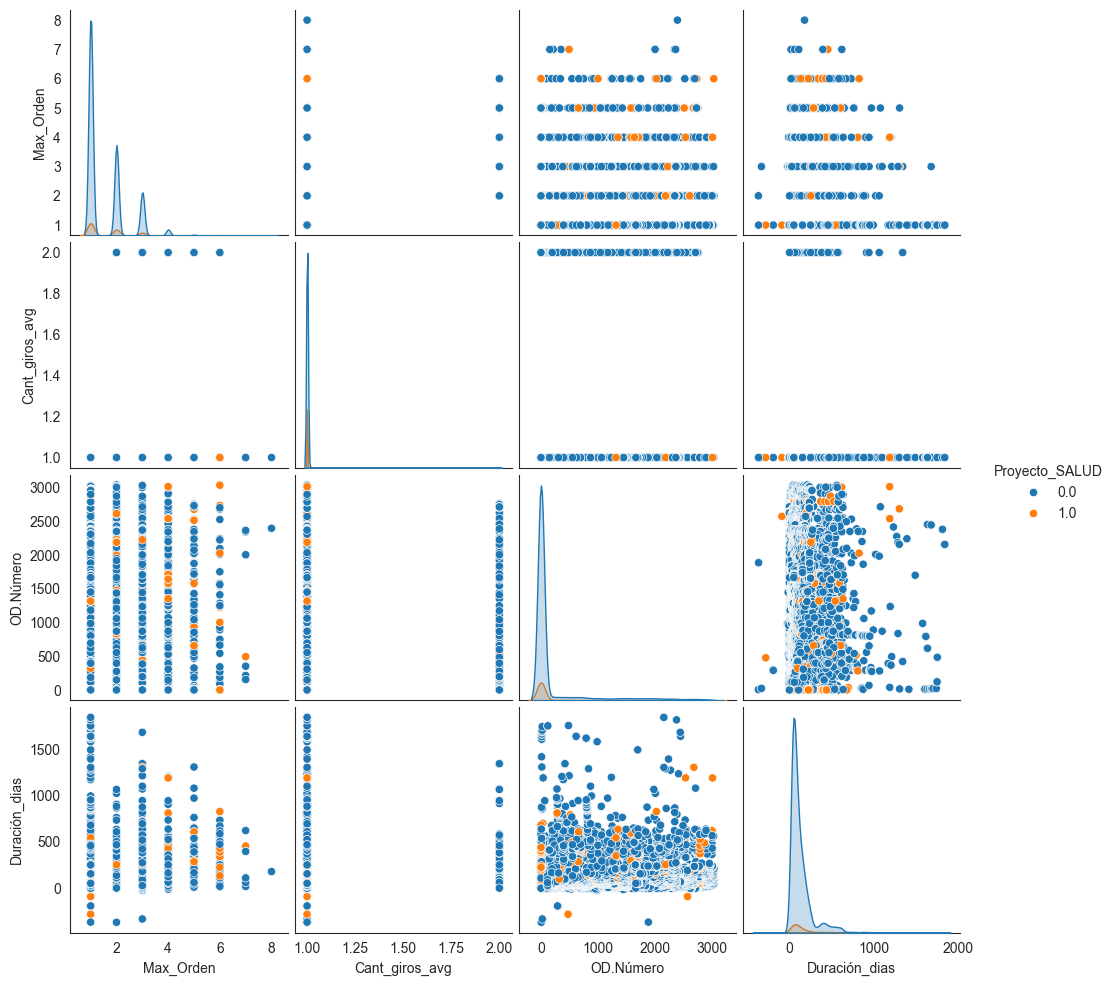

In [51]:
sns.pairplot(data=proyecto_2009_2024_df[col_num + ['Proyecto_SALUD']], hue='Proyecto_SALUD',  diag_kind="kde")

ANOVA (Análisis de Varianza)

Se usa cuando se quiere comparar las medias de más de dos grupos.
Supone que los datos siguen una distribución normal en cada grupo.
Requiere homogeneidad de varianzas (las varianzas en los grupos deben ser similares).
Es más potente cuando se cumplen sus supuestos.

    
Kruskal-Wallis

Es una alternativa no paramétrica a ANOVA, usada cuando los datos no cumplen la normalidad o las varianzas son muy diferentes.
Compara medianas en lugar de medias, por lo que es más robusta a valores atípicos.
Se usa cuando los datos son ordinales o la distribución no es normal.
Resumen práctico:

Si los datos son normales y tienen varianzas similares → usa ANOVA.
Si los datos no son normales o hay varianzas desiguales → usa Kruskal-Wallis.

In [52]:
import scipy.stats as stats

# Prueba ANOVA y Kruskal-Wallis para comparar medias de variables numéricas según categorías#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
anova_results = {}
kruskal_results = {}
for cat_var in col_categ:
    for num_var in col_num:
        groups = [group[num_var].dropna() for name, group in proyecto_2009_2024_df.groupby(cat_var)]
        if len(groups) > 1:
            stat, p_value_anova = stats.f_oneway(*groups)
            stat_kruskal, p_value_kruskal = stats.kruskal(*groups)
            anova_results[f'{num_var} ~ {cat_var}'] = p_value_anova
            kruskal_results[f'{num_var} ~ {cat_var}'] = p_value_kruskal

print("Resultados de la prueba ANOVA:")
for key, value in anova_results.items():
    print(f'{key}: p-value = {value}')

print("\nResultados de la prueba Kruskal-Wallis:")
for key, value in kruskal_results.items():
    print(f'{key}: p-value = {value}')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\2103514344.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[num_var].dropna() for name, group in proyecto_2009_2024_df.groupby(cat_var)]


Resultados de la prueba ANOVA:
Max_Orden ~ Tipo: p-value = 0.0
Cant_giros_avg ~ Tipo: p-value = 0.0
OD.Número ~ Tipo: p-value = 0.0
Duración_dias ~ Tipo: p-value = 0.0
Max_Orden ~ Resultado: p-value = 0.0
Cant_giros_avg ~ Resultado: p-value = 0.0
OD.Número ~ Resultado: p-value = 0.0
Duración_dias ~ Resultado: p-value = 0.0
Max_Orden ~ Proyecto_SALUD: p-value = 2.8823268497242355e-07
Cant_giros_avg ~ Proyecto_SALUD: p-value = 0.00012025698644973225
OD.Número ~ Proyecto_SALUD: p-value = 2.3214783921023254e-42
Duración_dias ~ Proyecto_SALUD: p-value = 0.006041235879174214

Resultados de la prueba Kruskal-Wallis:
Max_Orden ~ Tipo: p-value = 0.0
Cant_giros_avg ~ Tipo: p-value = 0.0
OD.Número ~ Tipo: p-value = 0.0
Duración_dias ~ Tipo: p-value = 0.0
Max_Orden ~ Resultado: p-value = 0.0
Cant_giros_avg ~ Resultado: p-value = 0.0
OD.Número ~ Resultado: p-value = 0.0
Duración_dias ~ Resultado: p-value = 3.2340125796784065e-283
Max_Orden ~ Proyecto_SALUD: p-value = 1.3563017673674993e-07
Cant_gir

* para Duración_dias ~ Proyecto_SALUD da un p-valor de  0.006041235879174214
  significa que la media de Duración_dias varía significativamente según Proyecto_SALUD.
    * el p-valor de Kruskal-Wallis es 0.00011147738561838495, confirma que las diferencias entre grupos no se deben a la distribución normal, sino que hay una diferencia real en las medianas.



Si ambos tests dan p-valores similares (< 0.05), se puede concluir que hay diferencias significativas.

Si ANOVA da significativo pero Kruskal-Wallis no, revisa la normalidad de los datos, ya que ANOVA podría estar influenciado por valores atípicos.

Si Kruskal-Wallis es significativo pero ANOVA no, puede indicar que hay diferencias en la mediana pero no en la media.

In [53]:
proyecto_2009_2024_df.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Cant_comisiones_dist', 'Cant_giros',
       'Max_Orden', 'Cant_giros_avg', 'Cabecera', 'Dictamen.Tipo', 'OD.Número',
       'Resultado', 'Fecha_max', 'Duración_dias', 'Tiene_info_movimiento',
       'Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD'],
      dtype='object')

#### Relación entre Tipo y resultado

In [54]:
# Controlar proyectos por Tipo y comisiones salud. 
# https://www2.hcdn.gob.ar/secparl/dgral_info_parlamentaria/dip/glosario/P/proys_ley_decla_reso.html
pd.crosstab(proyecto_2009_2024_df.Tipo, proyecto_2009_2024_df.Resultado, margins = True)

Resultado,APROBADO,MEDIA SANCION,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,RECHAZADO,RETIRADO,SANCIONADO,All
Tipo,,,,,,,
DECLARACION,3556,2,14014,0,0,0,17572
LEY,8,823,34268,0,3,33,35135
MENSAJE,106,1,615,1,0,0,723
MENSAJE Y PROYECTO DE LEY,0,137,118,1,0,11,267
RESOLUCION,8364,1,35626,1,0,0,43992
All,12034,964,84641,3,3,44,97689


Hay error si un proyecto DECLARACION, MENSAJE, RESOLUCIÓN tiene como resultado media sancion. Cantidad de registros 5

In [55]:
proyecto_2009_2024_df[(proyecto_2009_2024_df.Resultado.isin(['MEDIA SANCION'])) & (proyecto_2009_2024_df.Tipo.isin(['DECLARACION', 'MENSAJE', 'RESOLUCION']))]

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Exp..Diputados,Tipo,Cant_comisiones_dist,Cant_giros,Max_Orden,Cant_giros_avg,Cabecera,Dictamen.Tipo,OD.Número,Resultado,Fecha_max,Duración_dias,Tiene_info_movimiento,Proyecto_girado_a_comisiones_SALUD,Proyecto_SALUD
56292,HCDN172568,"DECLARAR ""CIUDAD DE LAS ARTES Y LAS IDEAS"", AL MUNICIPIO DE ALMIRANTE BROWN, PROVINCIA DE BUENOS AIRES.",2015-03-05,HCDN133TP004,0404-D-2015,DECLARACION,2,2,2,1.0,cabecera,Orden del Dia,2102.0,MEDIA SANCION,2015-07-15,132.0,True,0.0,0.0
78370,HCDN134031,"FIESTA PROVINCIAL DEL MELON QUE SE REALIZA ANUALMENTE DURANTE EL MES DE FEBRERO EN LA PROVINCIA DE SAN LUIS; SE LA DECLARA COMO ""FIESTA NACIONAL DEL MELON, LA AGRICULTURA Y LA PRODUCCION"".",2012-03-07,HCDN130TP004,0394-D-2012,DECLARACION,2,2,2,1.0,cabecera,Orden del Dia,696.0,MEDIA SANCION,2012-11-21,259.0,True,0.0,0.0
81860,HCDN128142,"EXPRESAR ADHESION AL ""DIA MUNDIAL DEL MEDIO AMBIENTE"", A CELEBRARSE EL 5 DE JUNIO DE CADA AÑO.",2011-06-02,HCDN129TP061,2956-D-2011,RESOLUCION,1,1,1,1.0,HCDN128142,Orden del Dia,2456.0,MEDIA SANCION,2015-11-26,1638.0,False,0.0,0.0
87919,HCDN151850,"REMISION DE LA CUENTA DE INVERSION CORRESPONDIENTE AL EJERCICIO FISCAL 2009, CONFORME A LOS TERMINOS DEL ARTICULO 75, INCISO 8 DE LA CONSTITUCION NACIONAL.",2010-07-06,HCDN128BAE018,0031-JGM-2010,MENSAJE,1,2,2,2.0,cabecera,Orden del Dia,1986.0,MEDIA SANCION,2013-06-05,1065.0,True,0.0,0.0


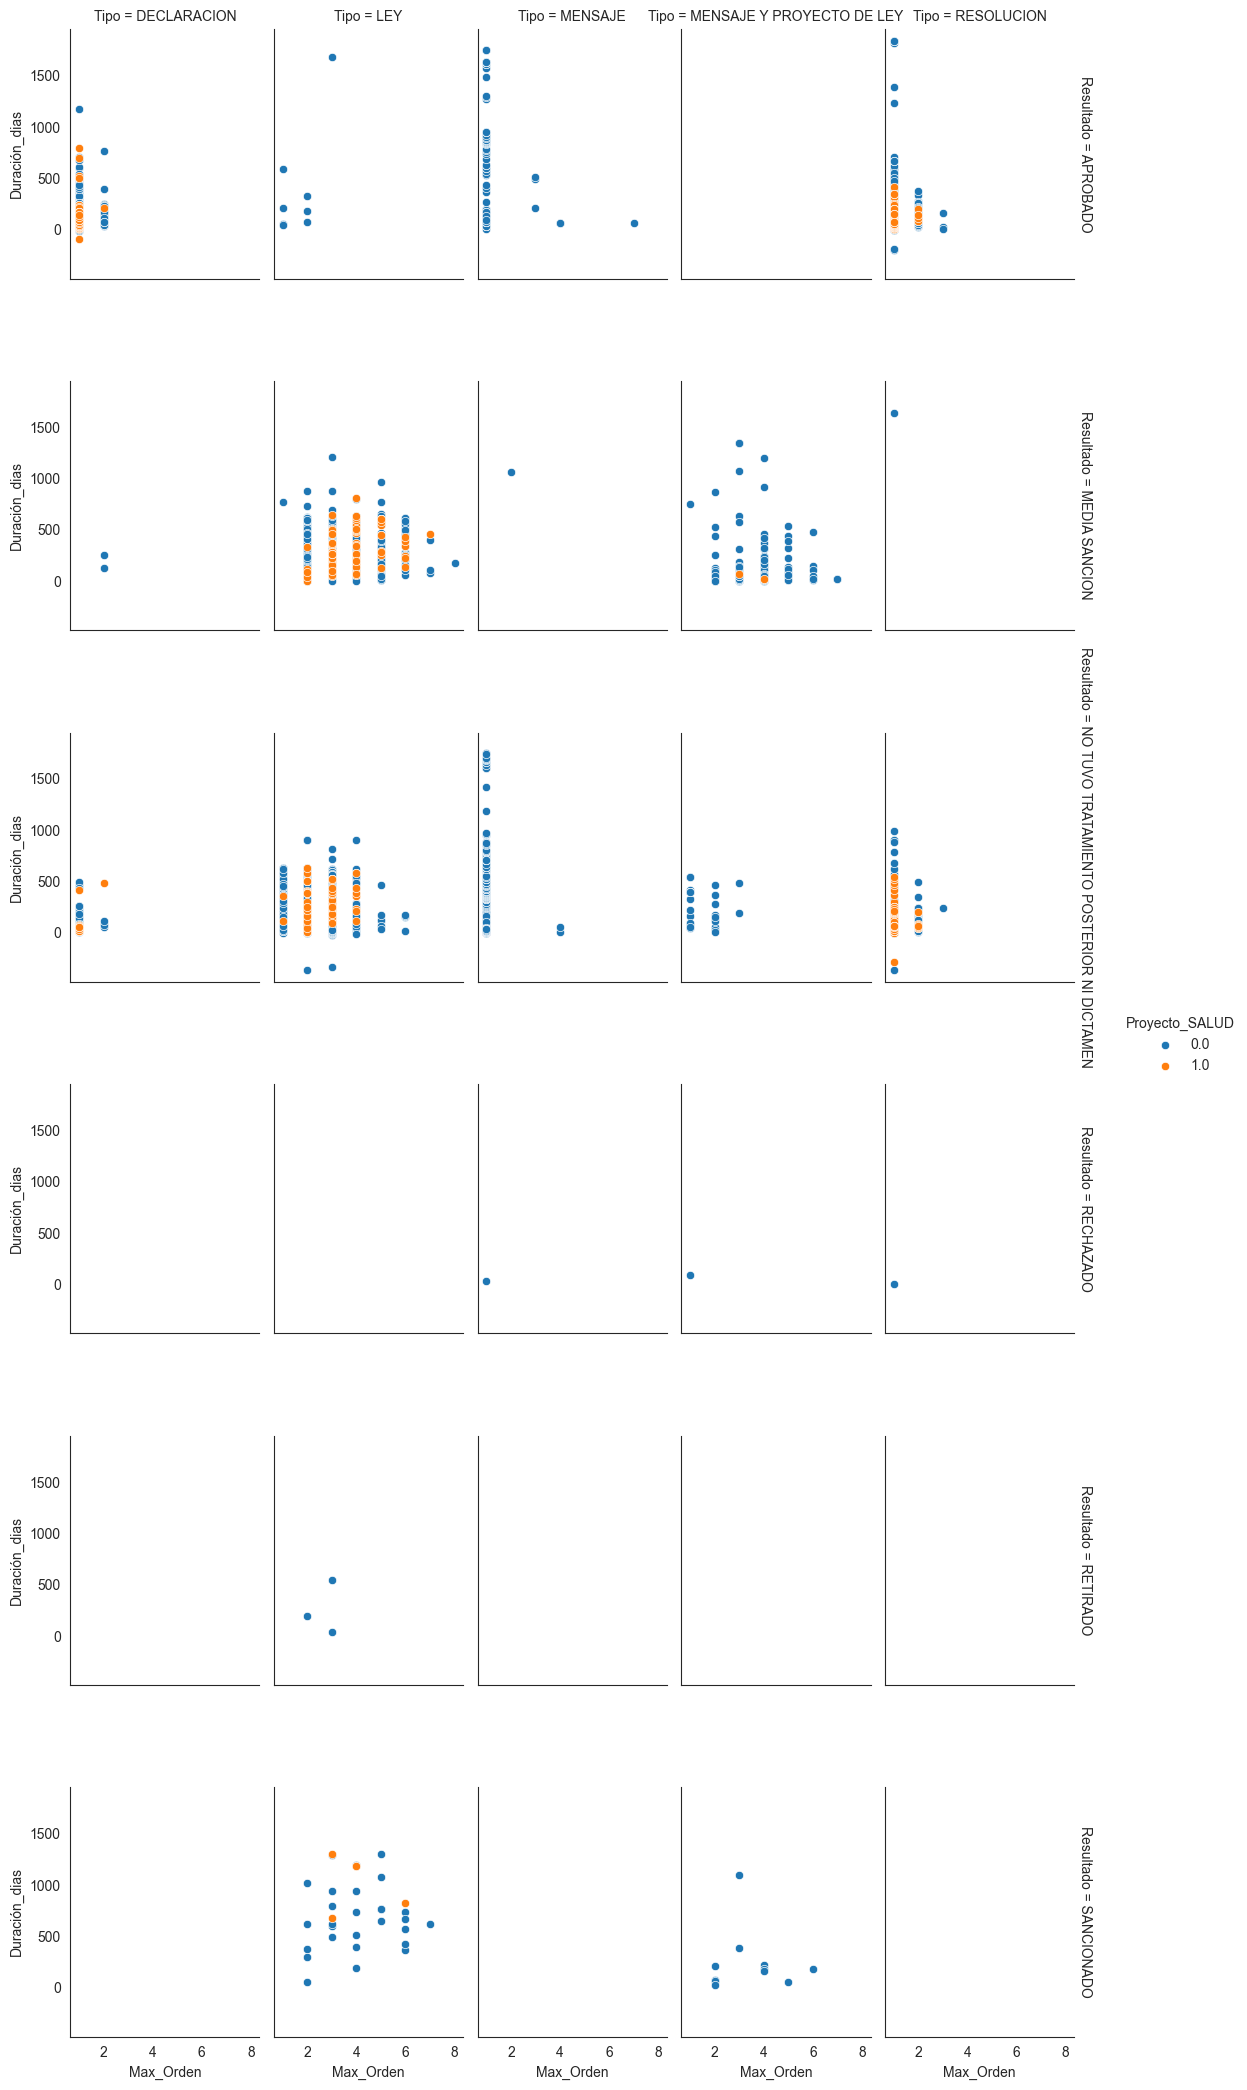

In [56]:
g = sns.FacetGrid(proyecto_2009_2024_df, col="Tipo",  row="Resultado" , hue = 'Proyecto_SALUD' , margin_titles=True, height=3.5, aspect=.65)
g.map(sns.scatterplot, "Max_Orden", "Duración_dias")
#g.refline(x=proyecto_2009_2024_df["Max_Orden"].median())
#g.refline(y=proyecto_2009_2024_df["Duración_dias"].median())
g.add_legend()


#### Ventana de tiempo

In [57]:
# PARA VER
num_col_2 = ['Max_Orden','Duración_dias','OD.Número']
categ_col_2 = ['Tipo','Resultado','Proyecto_SALUD']

In [58]:
publicacion_df.columns

Index(['Proyecto.ID', 'Años_mes', 'Año', 'Mes', 'Nombre_dia_semana',
       'Tiempo_desde_public_anterior', 'Tiempo_desde_Proyecto.ID_anterior',
       'ID', 'Diferencia_ID'],
      dtype='object')

In [59]:
publicacion_df2 = pd.merge(publicacion_df,proyecto_2009_2024_df[num_col_2+categ_col_2+['Proyecto.ID','Publicación.Fecha']], how = 'inner',left_on = 'Proyecto.ID', right_on = 'Proyecto.ID')
publicacion_df2 = publicacion_df2.set_index('Publicación.Fecha')

In [60]:
publicacion_df2.head()

,Proyecto.ID,Años_mes,Año,Mes,Nombre_dia_semana,Tiempo_desde_public_anterior,Tiempo_desde_Proyecto.ID_anterior,ID,Diferencia_ID,Max_Orden,Duración_dias,OD.Número,Tipo,Resultado,Proyecto_SALUD
Publicación.Fecha,,,,,,,,,,,,,,,
2009-01-08,HCDN102489,2009-01,2009,1,Thursday,3.0,0.0,102489,0.0,3,NaN,0.0,MENSAJE,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,0.0
2009-01-08,HCDN102490,2009-01,2009,1,Thursday,0.0,0.0,102490,1.0,1,NaN,0.0,RESOLUCION,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,0.0
2009-02-04,HCDN102491,2009-02,2009,2,Wednesday,0.0,27.0,102491,1.0,3,NaN,0.0,LEY,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,0.0
2009-02-04,HCDN102492,2009-02,2009,2,Wednesday,0.0,0.0,102492,1.0,2,NaN,0.0,LEY,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,0.0
2009-02-04,HCDN102493,2009-02,2009,2,Wednesday,0.0,0.0,102493,1.0,1,NaN,0.0,RESOLUCION,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,0.0


<Axes: >

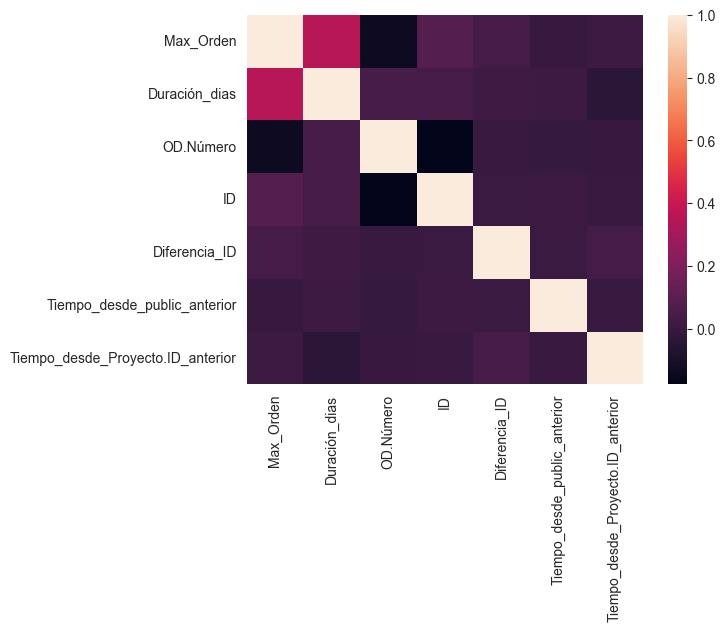

In [61]:
# Correlación
correlaccion = publicacion_df2[num_col_2+[ 'ID','Diferencia_ID','Tiempo_desde_public_anterior', 'Tiempo_desde_Proyecto.ID_anterior']].corr(method='pearson')
sns.heatmap(correlaccion,xticklabels=correlaccion.columns,
yticklabels=correlaccion.columns)

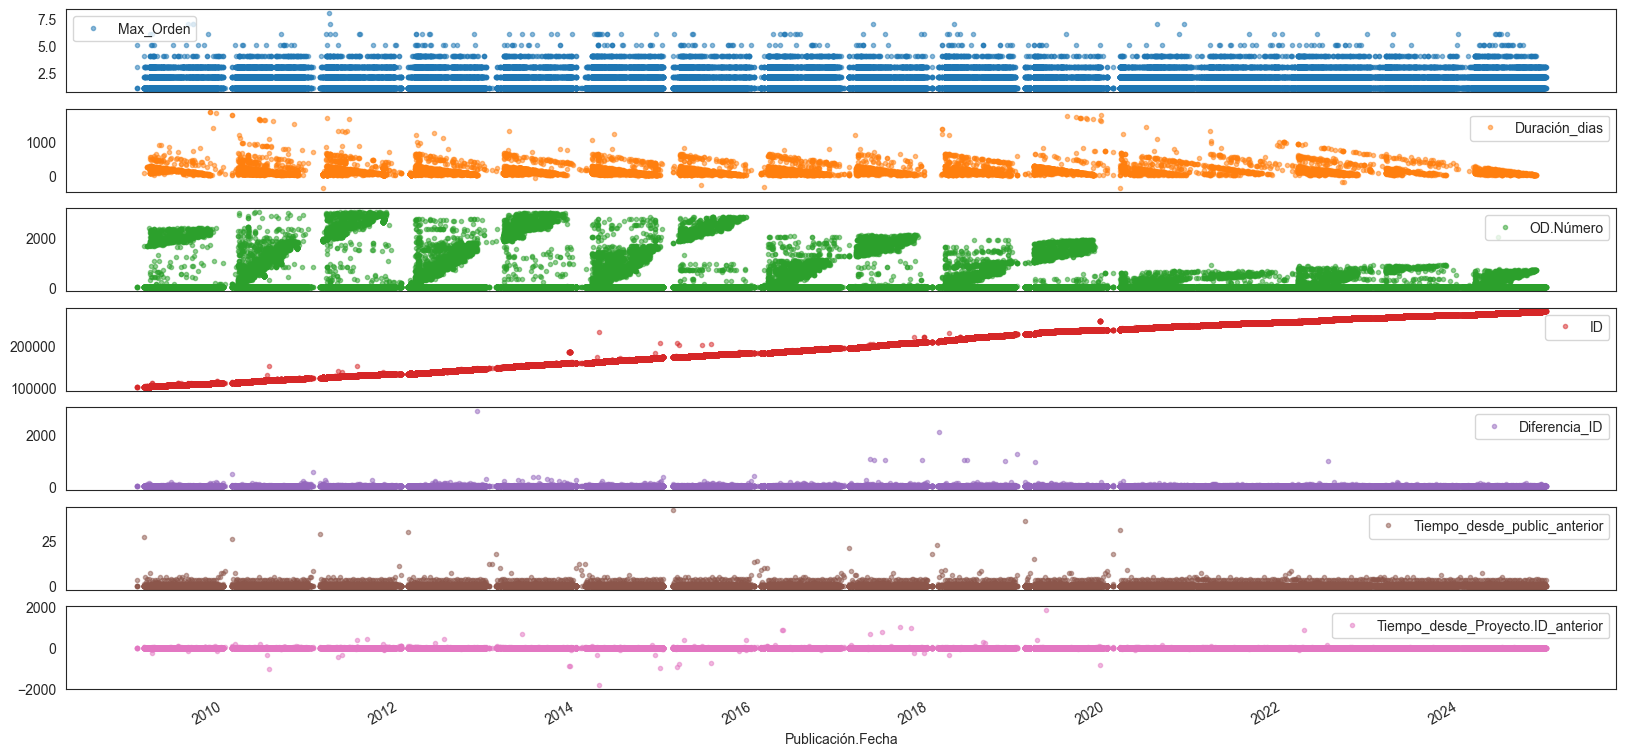

In [62]:
axes = publicacion_df2[num_col_2+[ 'ID','Diferencia_ID','Tiempo_desde_public_anterior', 'Tiempo_desde_Proyecto.ID_anterior']].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(20, 10), subplots=True)
#for ax in axes:
#    ax.set_ylabel('Frecuencia')

In [63]:
publicacion_df2.columns

Index(['Proyecto.ID', 'Años_mes', 'Año', 'Mes', 'Nombre_dia_semana',
       'Tiempo_desde_public_anterior', 'Tiempo_desde_Proyecto.ID_anterior',
       'ID', 'Diferencia_ID', 'Max_Orden', 'Duración_dias', 'OD.Número',
       'Tipo', 'Resultado', 'Proyecto_SALUD'],
      dtype='object')

<Axes: xlabel='Año', ylabel='Max_Orden'>

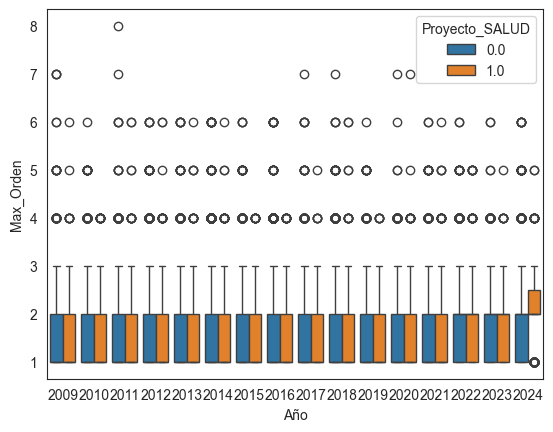

In [64]:
sns.boxplot(data=publicacion_df2, x='Año', y='Max_Orden', hue='Proyecto_SALUD')

<Axes: xlabel='Mes', ylabel='Max_Orden'>

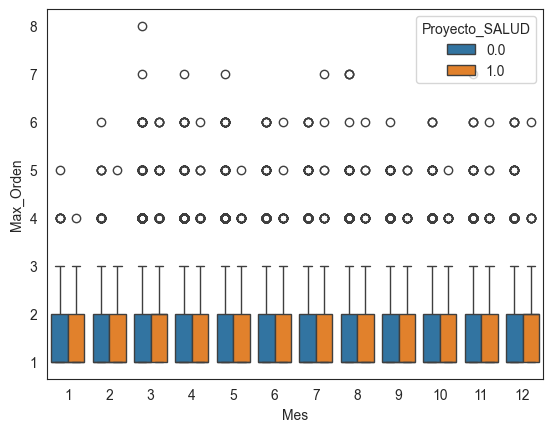

In [65]:
sns.boxplot(data=publicacion_df2, x='Mes', y='Max_Orden', hue='Proyecto_SALUD')

<Axes: xlabel='Nombre_dia_semana', ylabel='Max_Orden'>

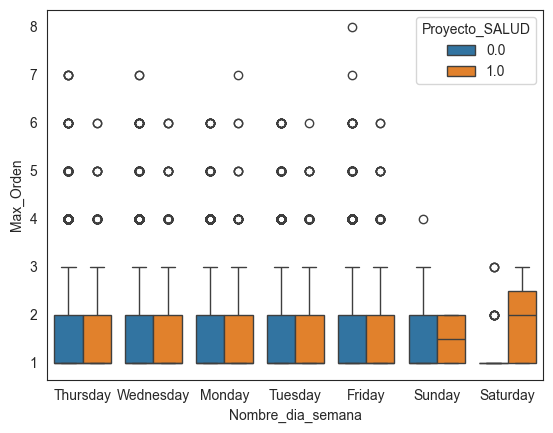

In [66]:
sns.boxplot(data=publicacion_df2, x='Nombre_dia_semana', y='Max_Orden',hue='Proyecto_SALUD')

<Axes: xlabel='Proyecto_SALUD', ylabel='Diferencia_ID'>

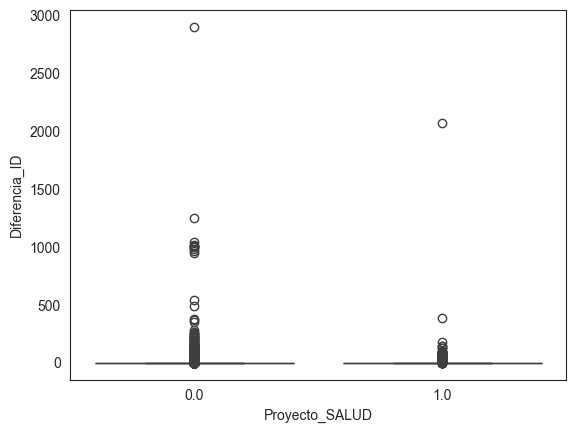

In [67]:
sns.boxplot(data=publicacion_df2, y='Diferencia_ID',x='Proyecto_SALUD')

<Axes: xlabel='Proyecto_SALUD', ylabel='Tiempo_desde_Proyecto.ID_anterior'>

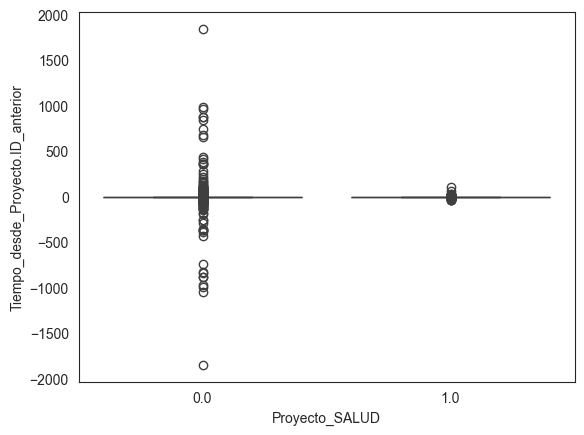

In [68]:
sns.boxplot(data=publicacion_df2, y='Tiempo_desde_Proyecto.ID_anterior',x='Proyecto_SALUD')

In [69]:
ano_tipo_df = pd.pivot_table(publicacion_df2, values=['Proyecto.ID'], index=['Año','Tipo','Proyecto_SALUD','Resultado'],
                       aggfunc={'Proyecto.ID': "count"
                                
                               }).reset_index()
ano_tipo_df 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\3134346582.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ano_tipo_df = pd.pivot_table(publicacion_df2, values=['Proyecto.ID'], index=['Año','Tipo','Proyecto_SALUD','Resultado'],


,Año,Tipo,Proyecto_SALUD,Resultado,Proyecto.ID
0,2009,DECLARACION,0.0,APROBADO,214
1,2009,DECLARACION,0.0,MEDIA SANCION,0
2,2009,DECLARACION,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,715
3,2009,DECLARACION,0.0,RECHAZADO,0
4,2009,DECLARACION,0.0,RETIRADO,0
...,...,...,...,...,...
955,2024,RESOLUCION,1.0,MEDIA SANCION,0
956,2024,RESOLUCION,1.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,146
957,2024,RESOLUCION,1.0,RECHAZADO,0
958,2024,RESOLUCION,1.0,RETIRADO,0


Text(0.5, 0, 'Año (publicación)')

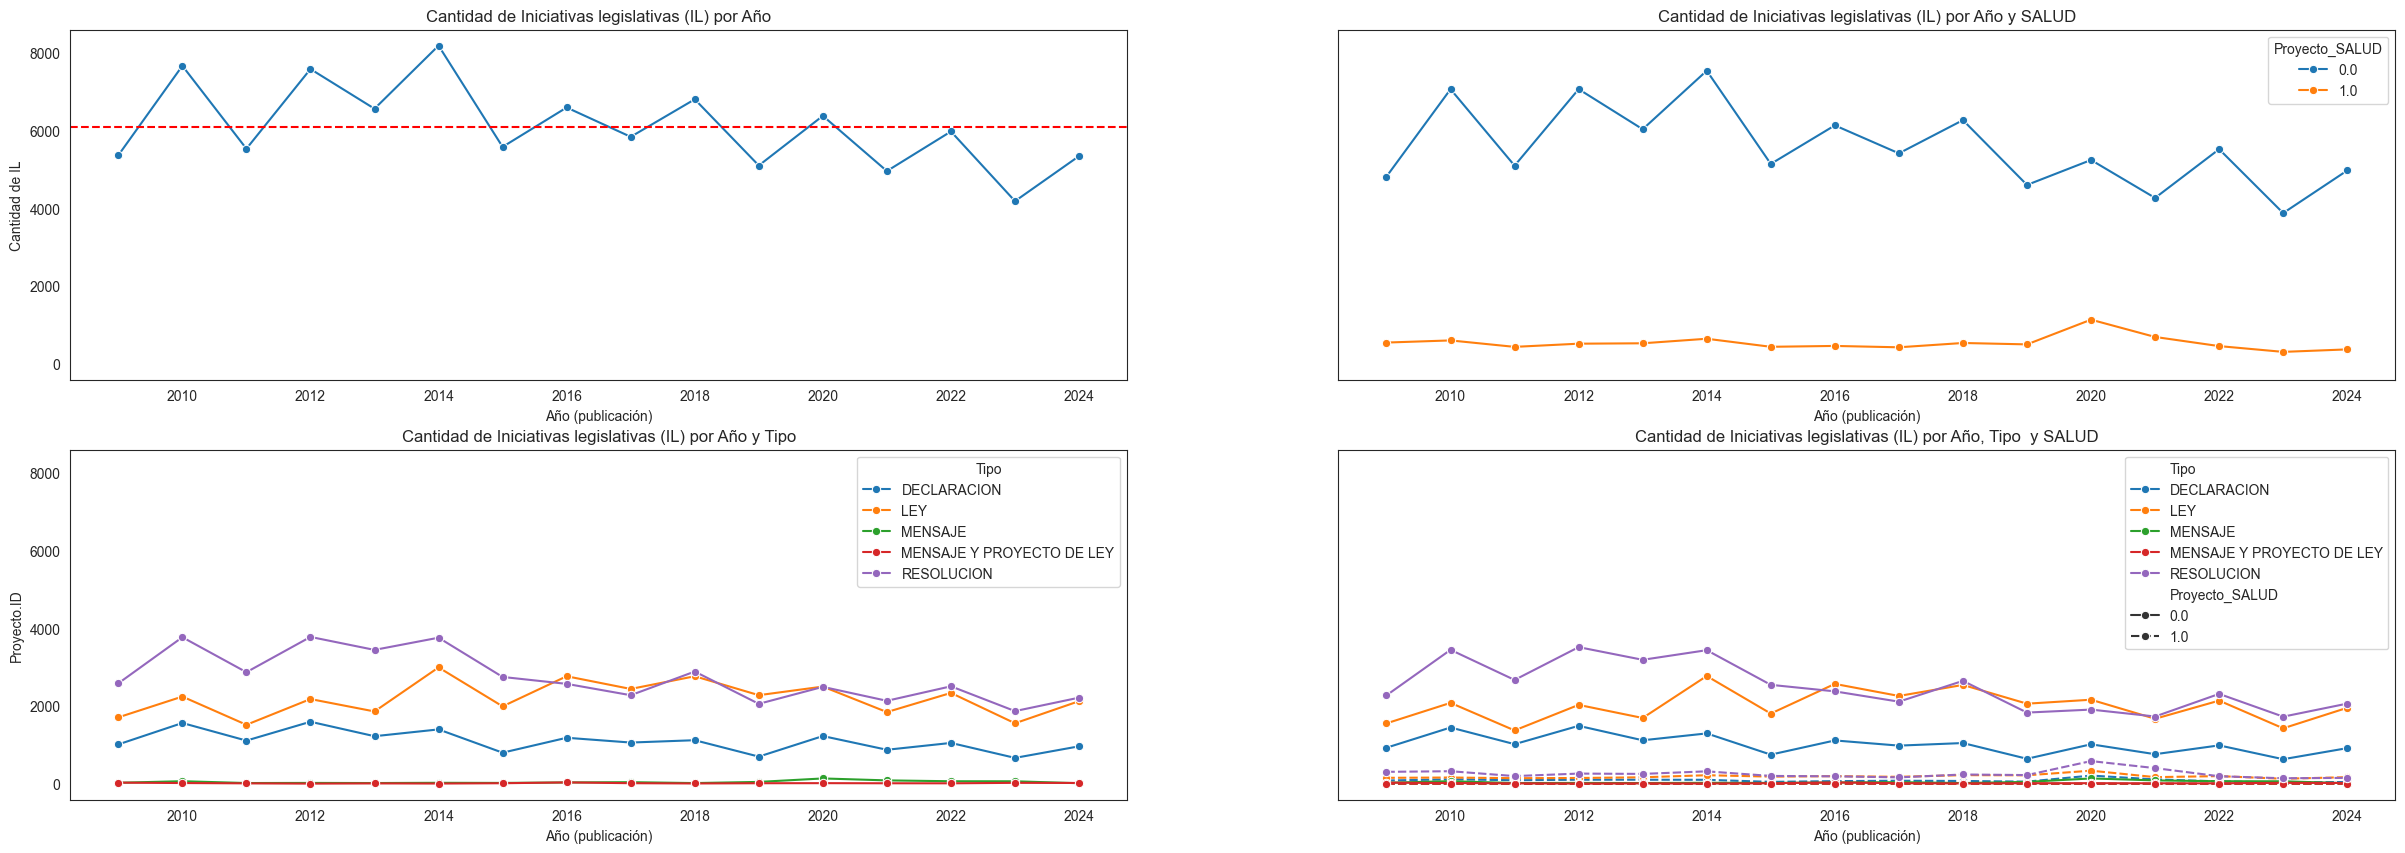

In [70]:
f, axs = plt.subplots(2, 2, figsize=(30, 10), sharey = True)
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum', errorbar= None , linestyle='-', ax = axs[0][0], marker="o")
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Proyecto_SALUD', marker="o" ,data =ano_tipo_df,  errorbar= None , linestyle='-',ax = axs[0][1])
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', data =ano_tipo_df,  marker="o", errorbar= None , linestyle='-',ax = axs[1][0])
sns.lineplot(x=ano_tipo_df['Año'], y=ano_tipo_df['Proyecto.ID'], estimator='sum',  hue = 'Tipo', 
style="Proyecto_SALUD", data =ano_tipo_df,  errorbar= None , linestyle='-',ax = axs[1][1], marker="o")

axs[0][0].axhline(y=ano_tipo_df.groupby('Año')['Proyecto.ID'].sum().mean(), color='r', linestyle='--')
axs[0][0].set_title('Cantidad de Iniciativas legislativas (IL) por Año')
axs[0][0].set_xlabel("Año (publicación)")
axs[0][0].set_ylabel("Cantidad de IL")
axs[0][1].set_title('Cantidad de Iniciativas legislativas (IL) por Año y SALUD')
axs[0][1].set_xlabel("Año (publicación)")
axs[1][0].set_title('Cantidad de Iniciativas legislativas (IL) por Año y Tipo')
axs[1][0].set_xlabel("Año (publicación)")
axs[1][1].set_title('Cantidad de Iniciativas legislativas (IL) por Año, Tipo  y SALUD')
axs[1][1].set_xlabel("Año (publicación)")


#### LIMPIEZA DE DATOS Y TRANSFORMACIONES

In [71]:
# Eliminar registros con error 
print('Base proyecto_2009_2024_df:',proyecto_2009_2024_df.shape)
proyecto_2009_2024_df_LIMPIO = proyecto_2009_2024_df[~((proyecto_2009_2024_df.Resultado.isin(['MEDIA SANCION'])) & (proyecto_2009_2024_df.Tipo.isin(['DECLARACION', 'MENSAJE', 'RESOLUCION'])))].copy()
print('Base proyecto_2009_2024_df_LIMPIO:',proyecto_2009_2024_df_LIMPIO.shape)

Base proyecto_2009_2024_df: (97742, 19)
Base proyecto_2009_2024_df_LIMPIO: (97738, 19)


#### Valores faltantes

In [72]:
import missingno as msno


<Axes: >

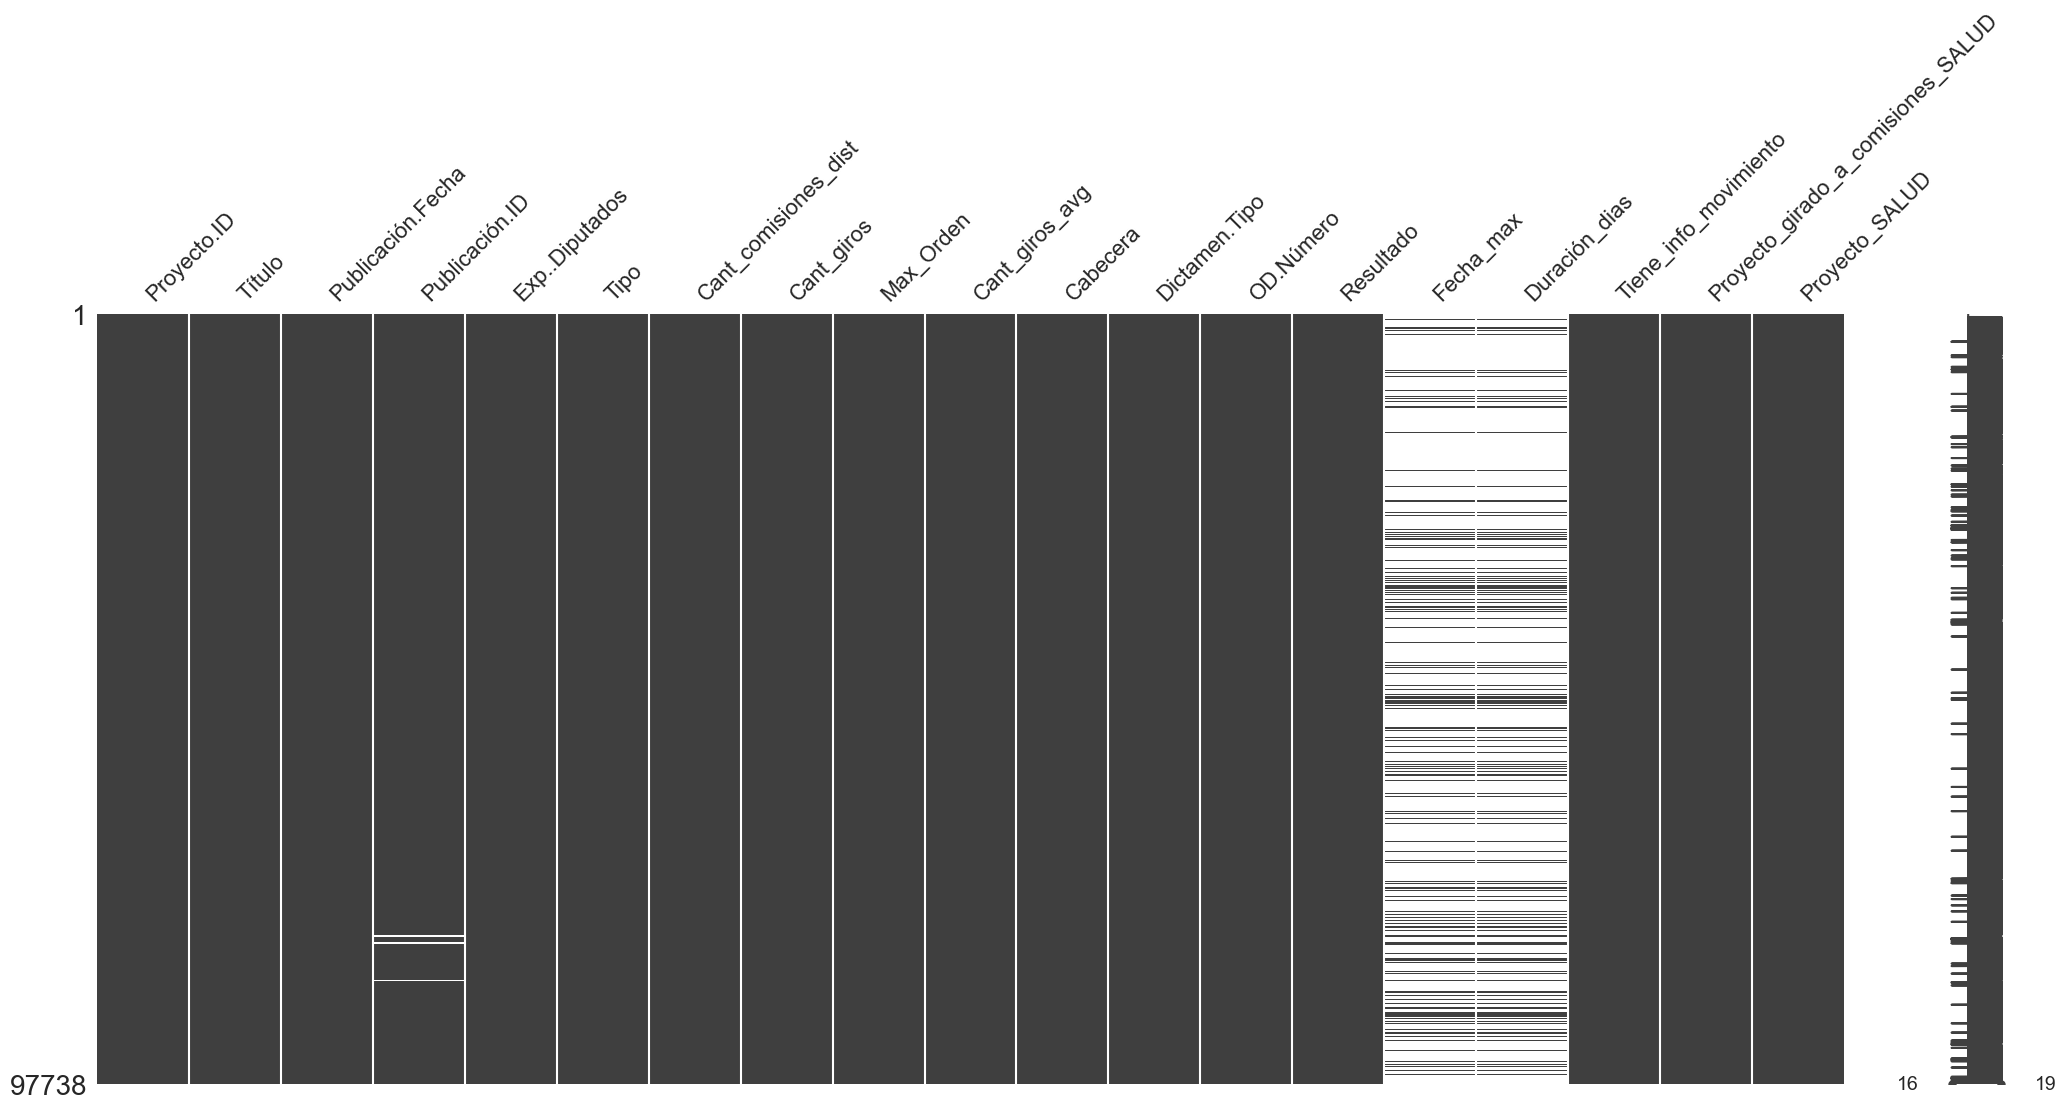

In [73]:
msno.matrix(proyecto_2009_2024_df_LIMPIO)

<Axes: >

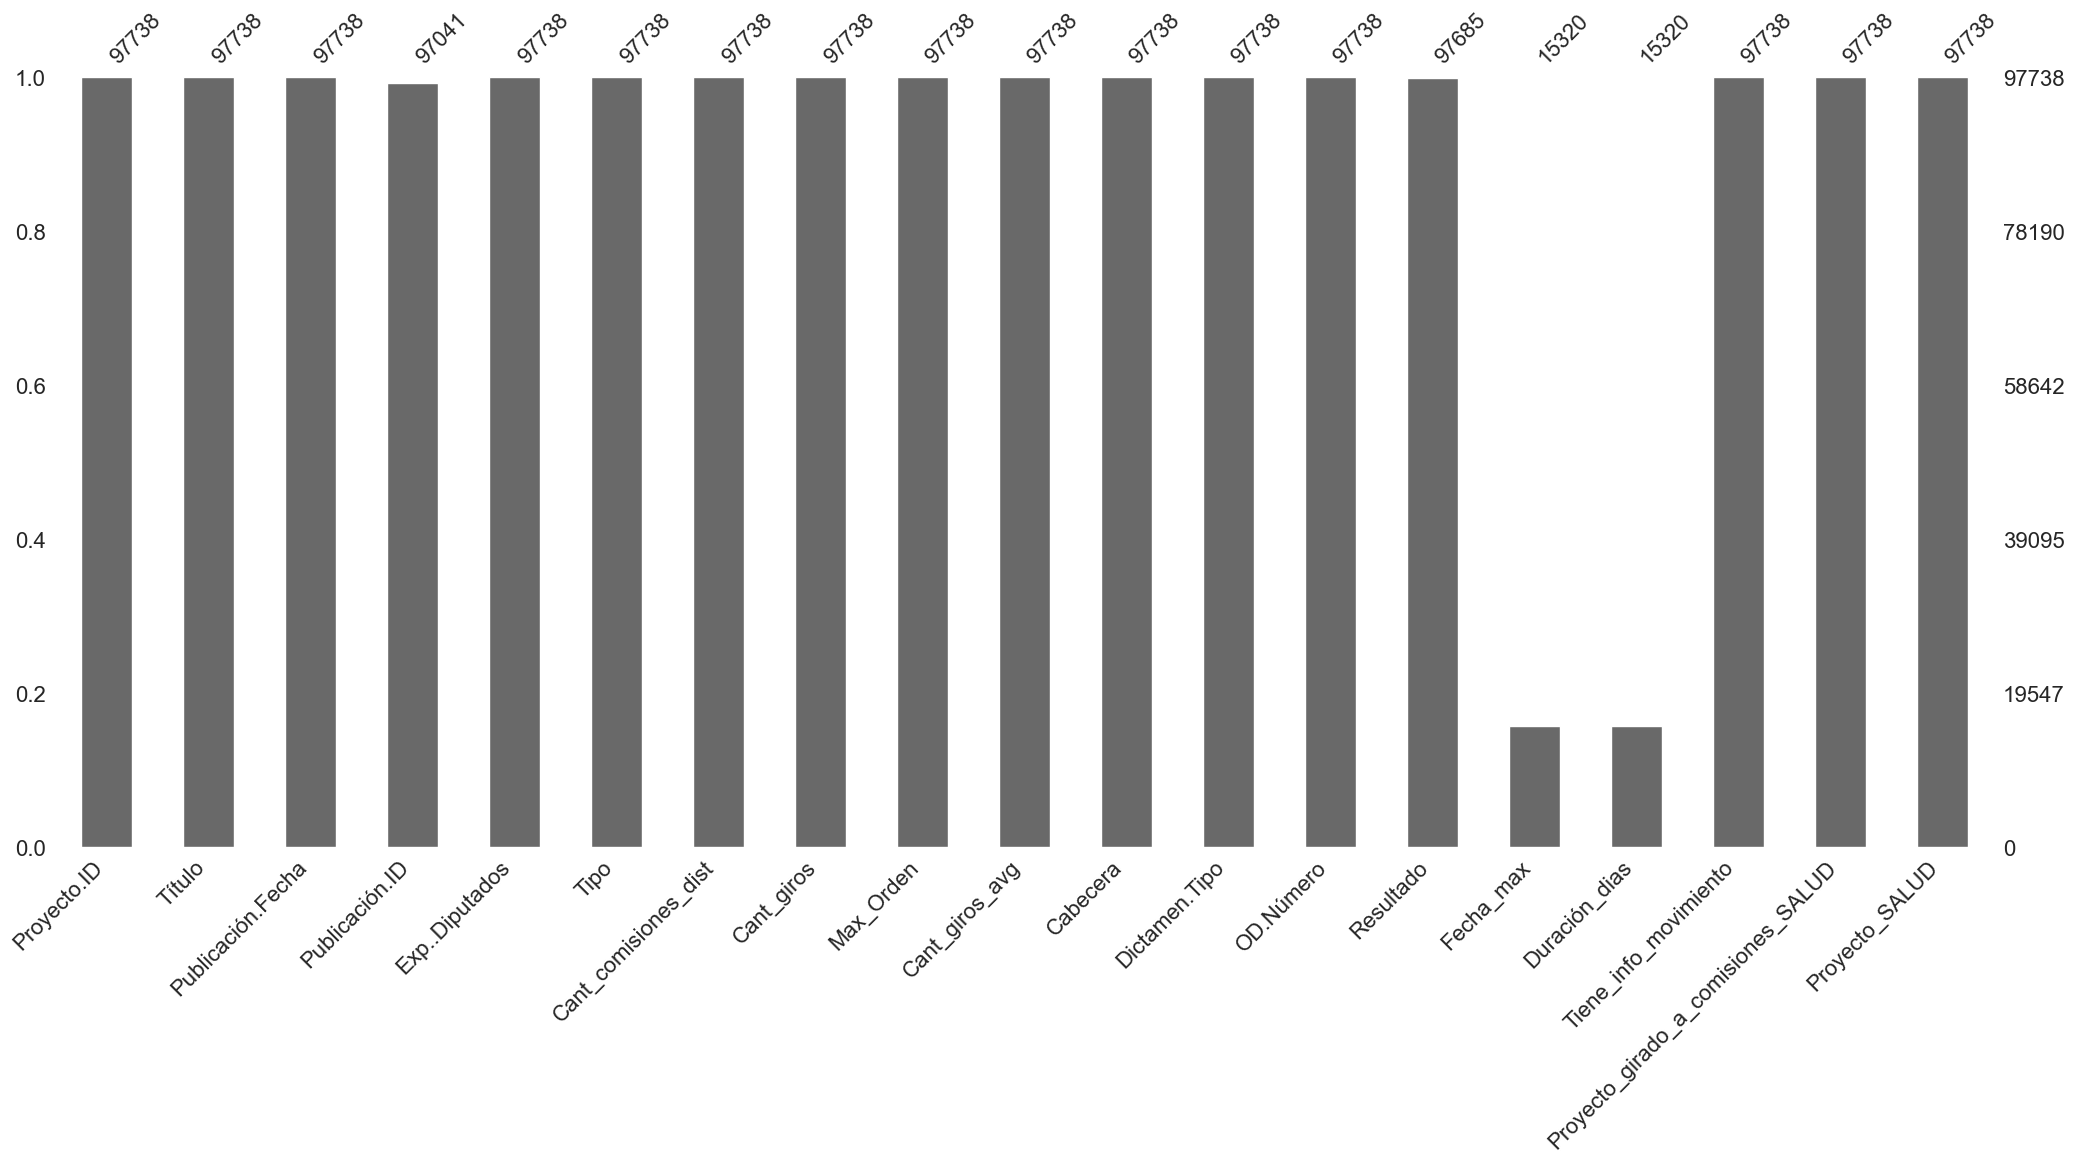

In [74]:
msno.bar(proyecto_2009_2024_df_LIMPIO)

<Axes: >

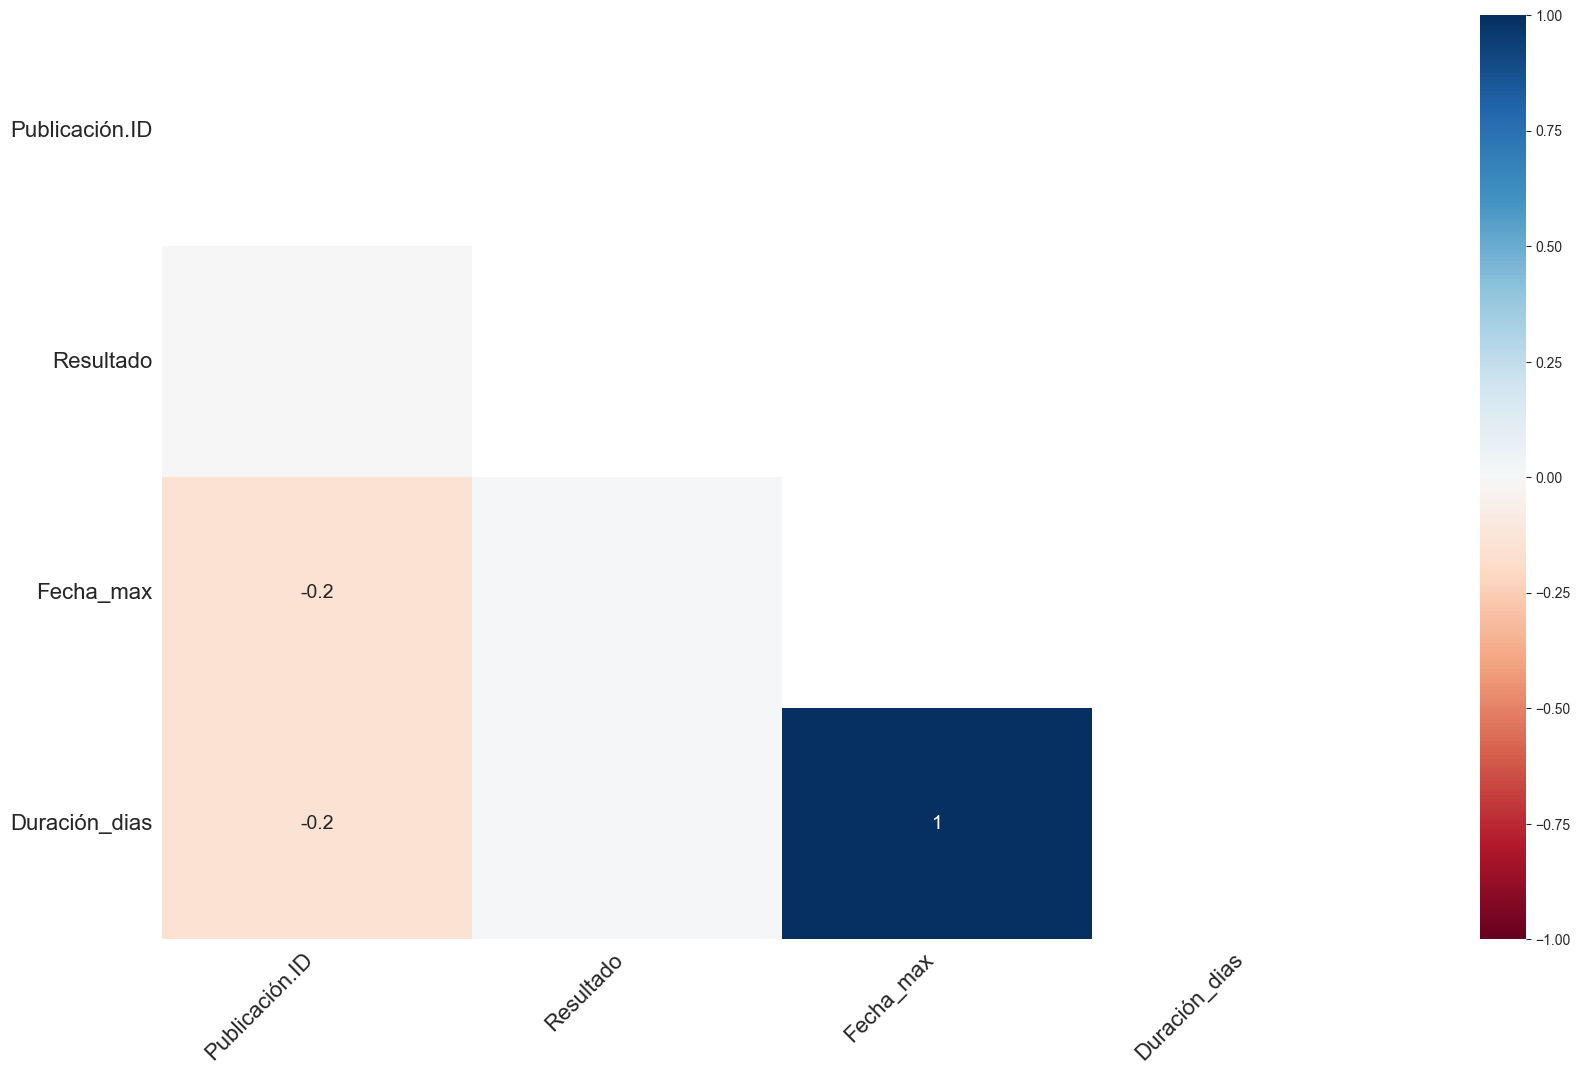

In [75]:
msno.heatmap(proyecto_2009_2024_df_LIMPIO)


In [76]:
## En caso de valores nulos en resultado, el expediente no tuvo dictamen de comisión ni tratamiento posterior.
# Que representa resultado
# Desde fuente de datos max_resultado_df.fillna({'Resultado': 'NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN'}, inplace=True)
proyecto_2009_2024_df_LIMPIO['Resultado'].unique()

['NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN', 'APROBADO', 'MEDIA SANCION', 'SANCIONADO', NaN, 'RECHAZADO', 'RETIRADO']
Categories (6, object): ['APROBADO', 'MEDIA SANCION', 'NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN', 'RECHAZADO', 'RETIRADO', 'SANCIONADO']

In [77]:
# Proyectos con Nulos
proyecto_2009_2024_df_LIMPIO[proyecto_2009_2024_df_LIMPIO['Resultado'].isna()].describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Proyecto.ID,53,53,HCDN215217,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Título,53,53,"MODIFICACION DEL CAPITULO XIII: REGIMEN DE INFRACCIONES Y SANCIONES DE LA LEY 24922, FEDERAL DE PESCA.",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publicación.Fecha,53,NaN,NaN,NaN,2015-01-26 09:57:44.150943488,2009-01-05 00:00:00,2011-05-04 00:00:00,2014-08-05 00:00:00,2019-03-20 00:00:00,2022-06-29 00:00:00,NaN
Publicación.ID,53,52,HCDN137TP084,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exp..Diputados,53,53,0877-D-2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo,53,4,LEY,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cant_comisiones_dist,53.0,NaN,NaN,NaN,2.792453,1.0,2.0,3.0,3.0,6.0,1.098224
Cant_giros,53.0,NaN,NaN,NaN,3.226415,1.0,2.0,3.0,4.0,6.0,1.203225
Max_Orden,53.0,NaN,NaN,NaN,3.226415,1.0,2.0,3.0,4.0,6.0,1.203225
Cant_giros_avg,53.0,NaN,NaN,NaN,1.150943,1.0,1.0,1.0,1.0,2.0,0.36142


In [78]:
# Limpiamos
proyecto_2009_2024_df_LIMPIO['Resultado'] = proyecto_2009_2024_df_LIMPIO['Resultado'].cat.add_categories(['SIN INFORMACIÓN DE RESULTADO DE PROYECTO'])
proyecto_2009_2024_df_LIMPIO['Resultado'] = proyecto_2009_2024_df_LIMPIO['Resultado'].fillna('SIN INFORMACIÓN DE RESULTADO DE PROYECTO')
# Mostrar
print("Cantidad de Nan en resultado:",proyecto_2009_2024_df_LIMPIO['Resultado'].isna().sum())


Cantidad de Nan en resultado: 0


In [79]:
proyecto_2009_2024_df_LIMPIO.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Cant_comisiones_dist', 'Cant_giros',
       'Max_Orden', 'Cant_giros_avg', 'Cabecera', 'Dictamen.Tipo', 'OD.Número',
       'Resultado', 'Fecha_max', 'Duración_dias', 'Tiene_info_movimiento',
       'Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD'],
      dtype='object')

##### Error en duración de días

In [80]:
#  Hay registros inconsitente, al error lo vamos a identificar como -1
proyecto_2009_2024_df_LIMPIO.loc[proyecto_2009_2024_df_LIMPIO['Duración_dias']<0,['Proyecto.ID','Tipo','Publicación.ID','Publicación.Fecha','Fecha_max','Duración_dias']]

,Proyecto.ID,Tipo,Publicación.ID,Publicación.Fecha,Fecha_max,Duración_dias
11079,HCDN262801,RESOLUCION,HCDN140TP135,2022-09-08,2022-02-26,-194.0
11238,HCDN262551,RESOLUCION,HCDN140TP130,2022-09-01,2022-02-23,-190.0
26684,HCDN237775,LEY,HCDN137TP182,2020-02-28,2020-02-26,-2.0
26700,HCDN237796,LEY,HCDN137TP182,2020-02-28,2019-02-26,-367.0
26705,HCDN237770,LEY,HCDN137TP182,2020-02-28,2020-02-26,-2.0
26774,HCDN237550,MENSAJE Y PROYECTO DE LEY,HCDN137TP182,2020-02-28,2020-02-27,-1.0
32128,HCDN225512,LEY,HCDN136TP172,2018-11-29,2018-11-06,-23.0
32285,HCDN225111,RESOLUCION,NaN,2018-11-21,2018-11-20,-1.0
32319,HCDN225147,LEY,HCDN136TP166,2018-11-20,2018-11-06,-14.0
51128,HCDN182600,LEY,HCDN133TP170,2016-02-16,2015-03-22,-331.0


In [81]:
#  Se corrige el error de duración en días, a los valores negativos lo consideramos valores faltantes -1
proyecto_2009_2024_df_LIMPIO['Duración_dias_prep'] =  proyecto_2009_2024_df_LIMPIO['Duración_dias'] 
proyecto_2009_2024_df_LIMPIO.loc[proyecto_2009_2024_df_LIMPIO['Duración_dias_prep']<0, ['Duración_dias_prep']] = np.nan

# Los valores faltantes lo consideramos -1, y  para verificar que la duración en día se basa en resultado, analizarlo juntos
proyecto_2009_2024_df_LIMPIO['Duración_dias_prep'] = proyecto_2009_2024_df_LIMPIO['Duración_dias_prep'].fillna(-1)

#proyecto_2009_2024_df_LIMPIO.loc[proyecto_2009_2024_df_LIMPIO['Duración_dias']

In [82]:
## Duración en meses == 0 significa que la fecha de publicacion y la fecha maxima asociada en movimiento es la misma
#proyecto_2009_2024_df_LIMPIO.loc[proyecto_2009_2024_df_LIMPIO['Duración_dias_prep']==0,['Proyecto.ID','Resultado','Tipo','Publicación.ID','Publicación.Fecha','OD.Publicación','Fecha','Fecha_max','Duración_dias']].describe(include = 'all')

In [83]:
proyecto_2009_2024_df_LIMPIO['Duración_dias_prep'].describe()

count    97738.000000
mean        19.310463
std         75.516425
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max       1842.000000
Name: Duración_dias_prep, dtype: float64

#### Guardar objetos

In [84]:
# columnas
columnas = ['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID','Exp..Diputados', 'Tipo', 'Max_Orden','Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD' ,'Resultado', 'Tiene_info_movimiento', 'Duración_dias_prep']
proyecto_2009_2024_df_LIMPIO = pd.merge(proyecto_2009_2024_df_LIMPIO[columnas],publicacion_df, how = 'inner',left_on = 'Proyecto.ID', right_on = 'Proyecto.ID')


##### Crear nueva variable

In [85]:
# Explorar las fechas asociadas a los titulos de proyectos duplicados
# Se considera proyecto base al proyecto con titulo repetido con menor fecha, se considera sin anteedente, el valor asignado es False
df = titulosdup_df.groupby(['Título'])['Publicación.Fecha'].min().reset_index()
df = df[~df['Publicación.Fecha'].isna()]
df['Tiene_antecedente_por_titulo_proy'] = False

# Temporales
temp = pd.merge(titulosdup_df[['Proyecto.ID','Publicación.Fecha','Título']], df[['Título','Publicación.Fecha','Tiene_antecedente_por_titulo_proy']], how = 'left',left_on = ['Título','Publicación.Fecha'], right_on = ['Título','Publicación.Fecha'])
temp['Tiene_antecedente_por_titulo_proy'] = temp['Tiene_antecedente_por_titulo_proy'].fillna(True)
temp.head(4)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\4197260742.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = titulosdup_df.groupby(['Título'])['Publicación.Fecha'].min().reset_index()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\4197260742.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp['Tiene_antecedente_por_titulo_proy'] = temp['Tiene_antecedente_por_titulo_proy'].fillna(True)


,Proyecto.ID,Publicación.Fecha,Título,Tiene_antecedente_por_titulo_proy
0,HCDN280483,2024-12-18,COMPETITIVIDAD - LEY 25413 Y MODIFICATORIAS -. DEROGACION.,True
1,HCDN280381,2024-12-12,PROGRAMA NACIONAL PARA LA LUCHA CONTRA LA ENFERMEDAD DE ALZHEIMER. CREACION.,True
2,HCDN280383,2024-12-12,COMISION DE ETICA Y DISCIPLINA DE ESTA H. CAMARA. CREACION EN EL AMBITO DE LA COMISION DE ASUNTOS CONSTITUCIONALES.,True
3,HCDN280193,2024-12-04,DESIGNACION DE LA PROSECRETARIA DE COORDINACION OPERATIVA DE LA H CAMARA DE DIPUTADOS A LA SEÑORA DINA REZINOVSKY.,True


In [86]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Proyecto.ID                        5654 non-null   category      
 1   Publicación.Fecha                  5654 non-null   datetime64[ns]
 2   Título                             5654 non-null   category      
 3   Tiene_antecedente_por_titulo_proy  5654 non-null   bool          
dtypes: bool(1), category(2), datetime64[ns](1)
memory usage: 5.6 MB


In [87]:
temp['Tiene_antecedente_por_titulo_proy'].value_counts()

Tiene_antecedente_por_titulo_proy
True     2927
False    2727
Name: count, dtype: int64

In [88]:
proyecto_2009_2024_df_LIMPIO = pd.merge(proyecto_2009_2024_df_LIMPIO,temp[['Proyecto.ID','Tiene_antecedente_por_titulo_proy']], how = 'left',left_on = 'Proyecto.ID', right_on = 'Proyecto.ID')


In [89]:
proyecto_2009_2024_df_LIMPIO.isna().sum()

Proyecto.ID                               0
Título                                    0
Publicación.Fecha                         0
Publicación.ID                          697
Exp..Diputados                            0
Tipo                                      0
Max_Orden                                 0
Proyecto_girado_a_comisiones_SALUD        0
Proyecto_SALUD                            0
Resultado                                 0
Tiene_info_movimiento                     0
Duración_dias_prep                        0
Años_mes                                  0
Año                                       0
Mes                                       0
Nombre_dia_semana                         0
Tiempo_desde_public_anterior              0
Tiempo_desde_Proyecto.ID_anterior         0
ID                                        0
Diferencia_ID                             0
Tiene_antecedente_por_titulo_proy     92086
dtype: int64

In [90]:
proyecto_2009_2024_df_LIMPIO['Tiene_antecedente_por_titulo_proy'] = proyecto_2009_2024_df_LIMPIO['Tiene_antecedente_por_titulo_proy'].fillna(False)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39764\1057071482.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  proyecto_2009_2024_df_LIMPIO['Tiene_antecedente_por_titulo_proy'] = proyecto_2009_2024_df_LIMPIO['Tiene_antecedente_por_titulo_proy'].fillna(False)


In [91]:
proyecto_2009_2024_df_LIMPIO.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Max_Orden',
       'Proyecto_girado_a_comisiones_SALUD', 'Proyecto_SALUD', 'Resultado',
       'Tiene_info_movimiento', 'Duración_dias_prep', 'Años_mes', 'Año', 'Mes',
       'Nombre_dia_semana', 'Tiempo_desde_public_anterior',
       'Tiempo_desde_Proyecto.ID_anterior', 'ID', 'Diferencia_ID',
       'Tiene_antecedente_por_titulo_proy'],
      dtype='object')

In [92]:
proyecto_2009_2024_df_LIMPIO.isna().sum()

Proyecto.ID                             0
Título                                  0
Publicación.Fecha                       0
Publicación.ID                        697
Exp..Diputados                          0
Tipo                                    0
Max_Orden                               0
Proyecto_girado_a_comisiones_SALUD      0
Proyecto_SALUD                          0
Resultado                               0
Tiene_info_movimiento                   0
Duración_dias_prep                      0
Años_mes                                0
Año                                     0
Mes                                     0
Nombre_dia_semana                       0
Tiempo_desde_public_anterior            0
Tiempo_desde_Proyecto.ID_anterior       0
ID                                      0
Diferencia_ID                           0
Tiene_antecedente_por_titulo_proy       0
dtype: int64

In [93]:
# Guardamos el archivo binario proyecto filtrado
with open(RESULTADOS_DIR+'proyecto_2009_2024_LIMPIO2_df.pkl', 'wb') as file:
    pickle.dump(proyecto_2009_2024_df_LIMPIO,file)